**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
Total Data Size :  (178, 13) (178,)
Train/Test Sizes :  (151, 13) (27, 13) (151,) (27,)

Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]

Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.430330

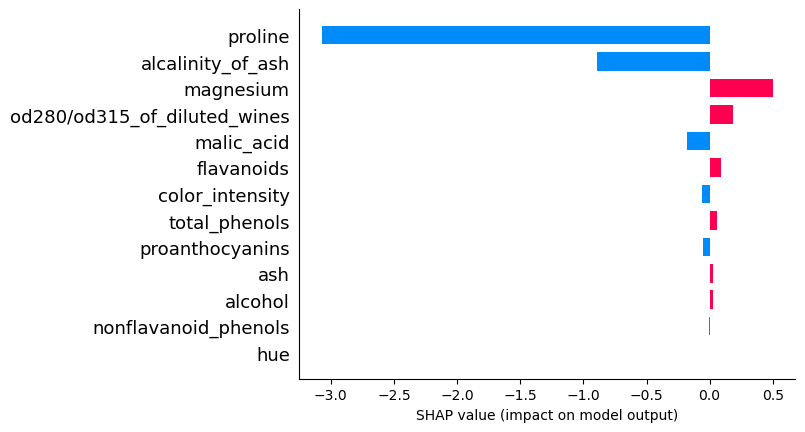

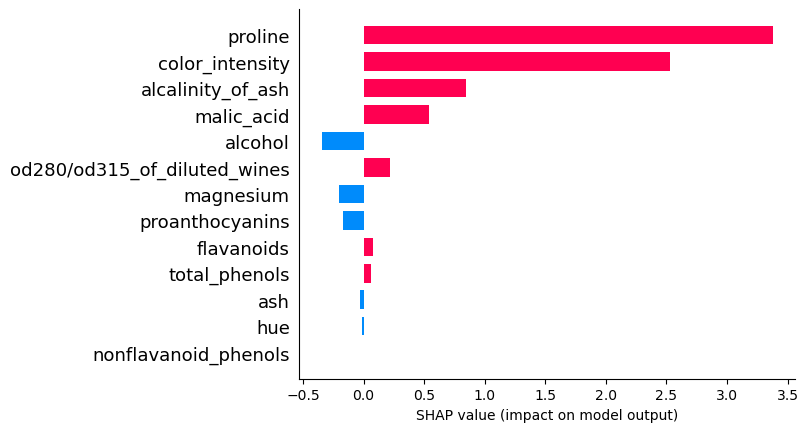

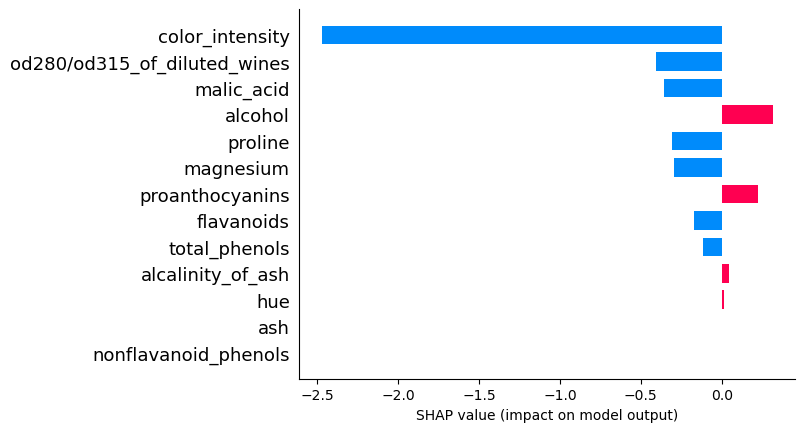

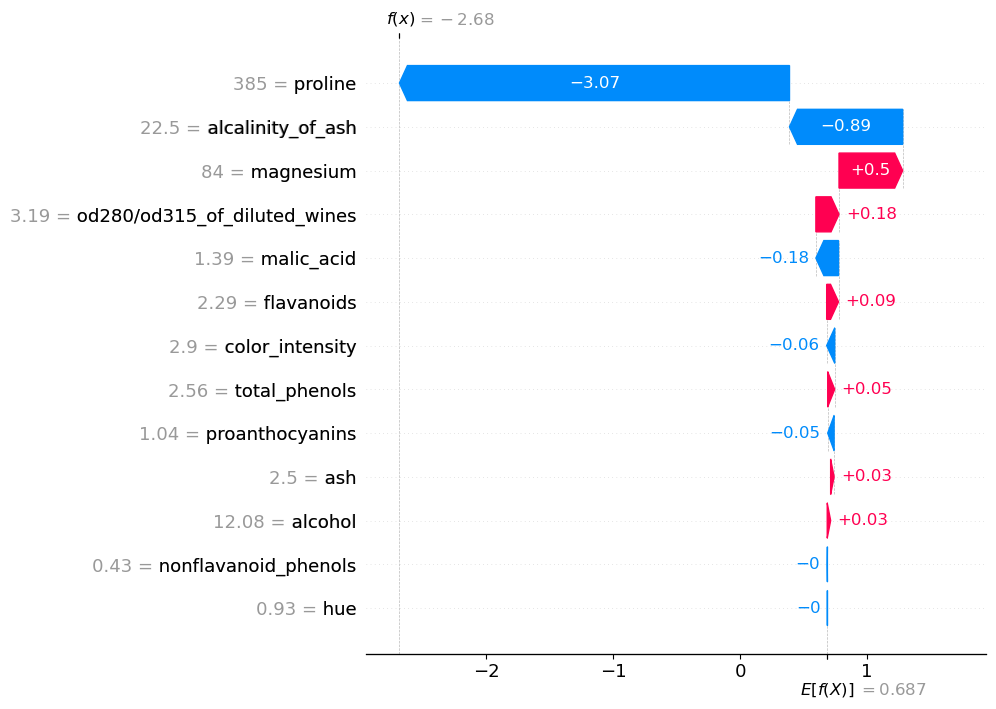

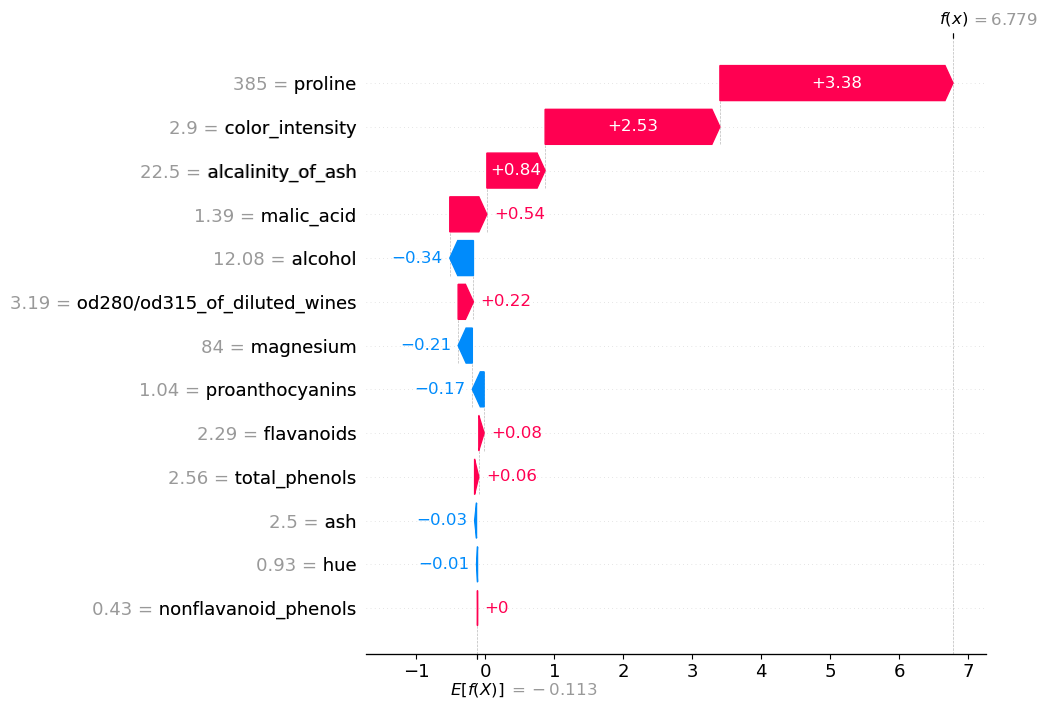

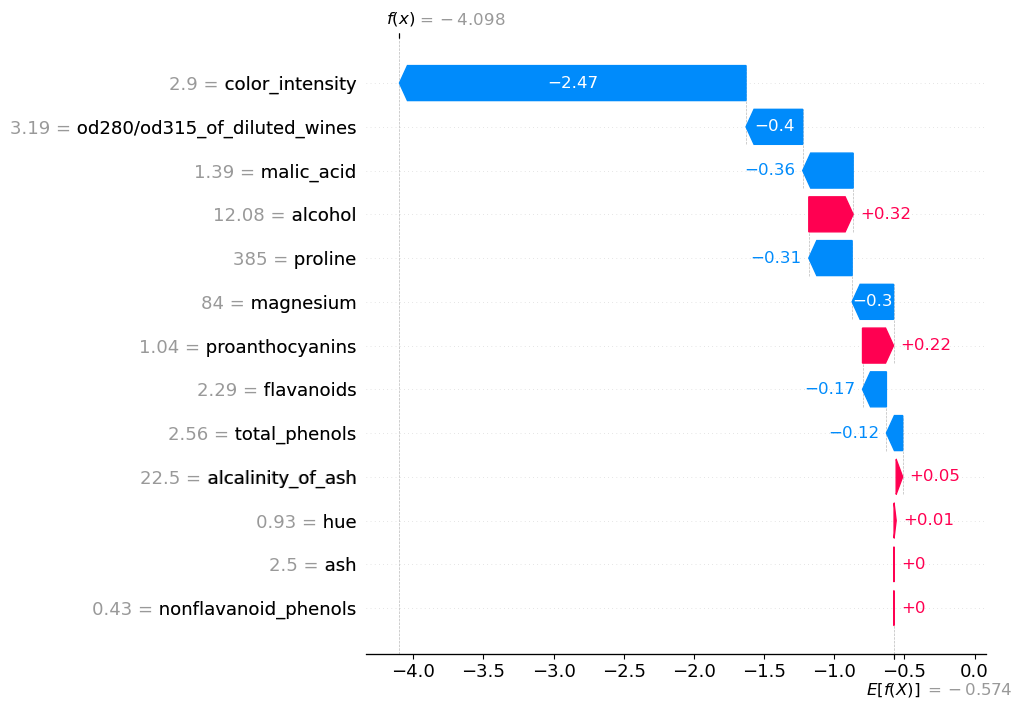

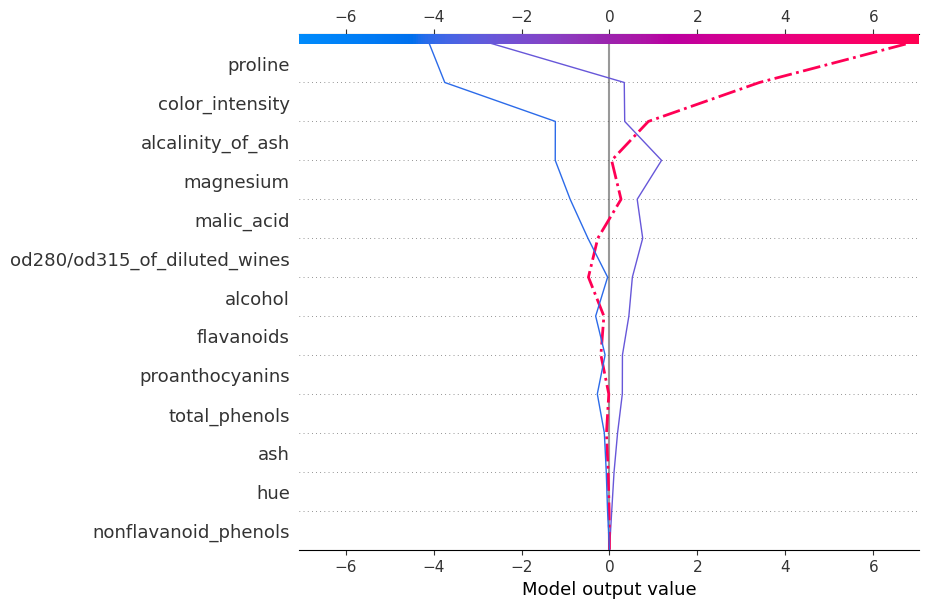

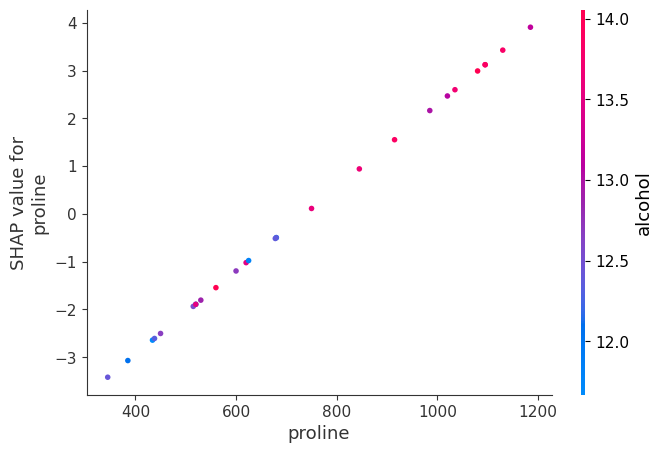

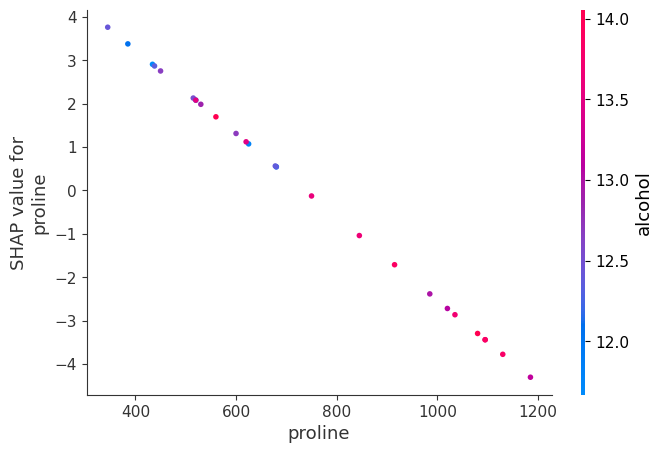

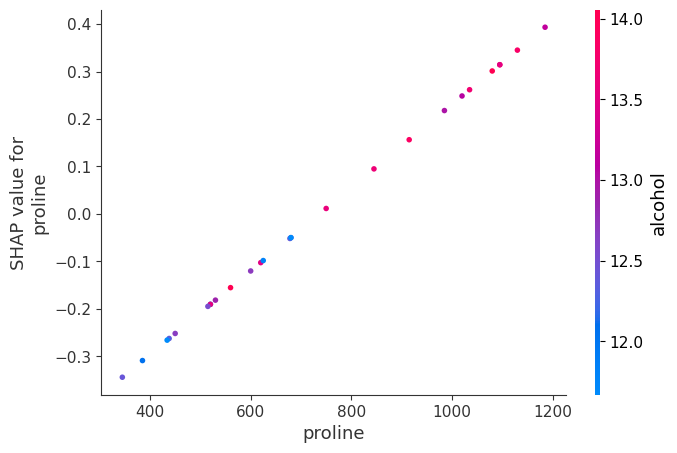

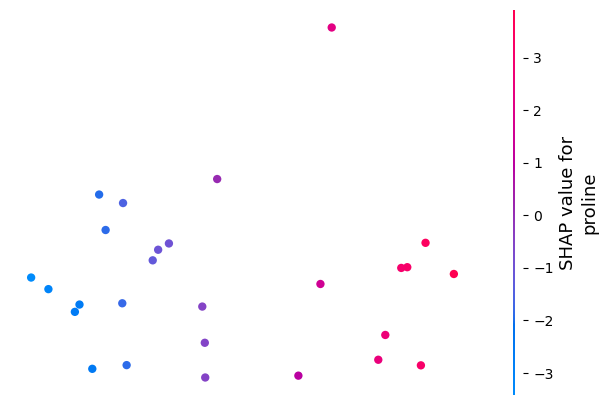

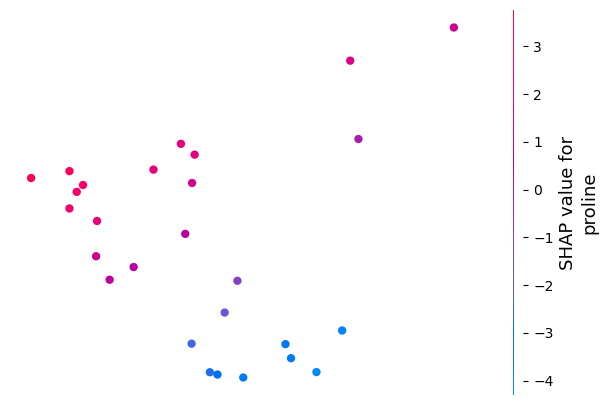

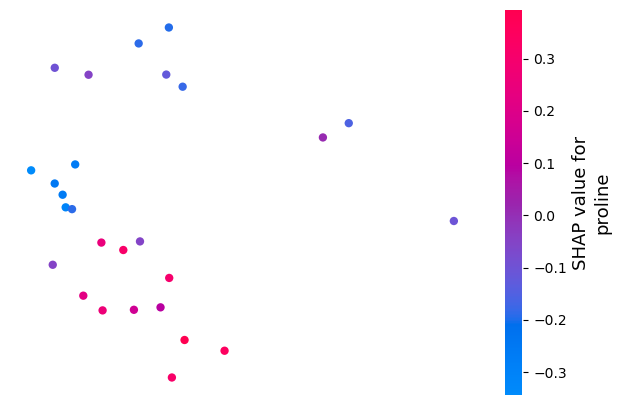

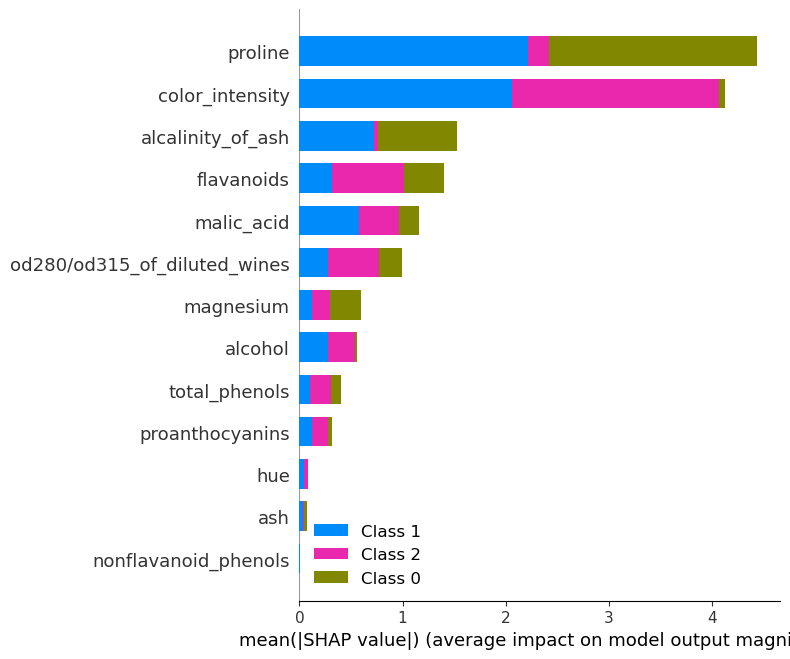

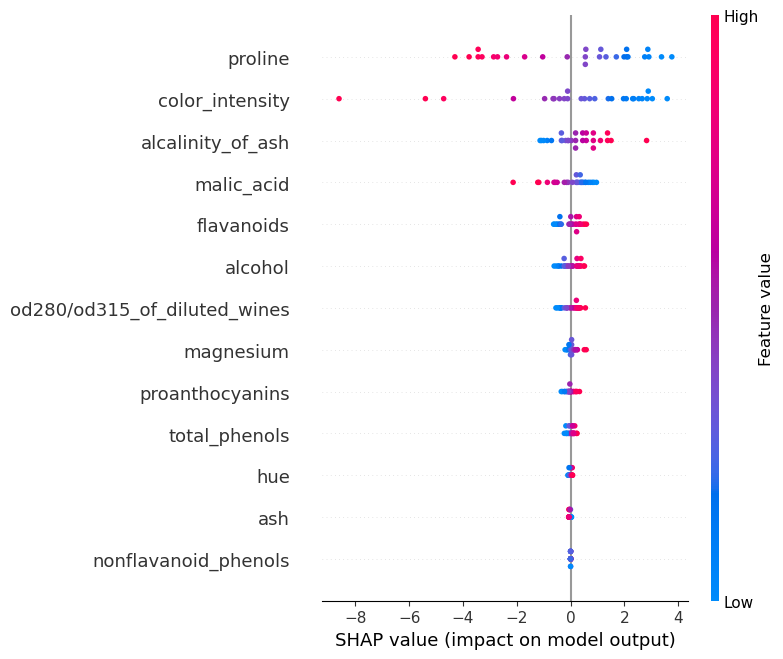

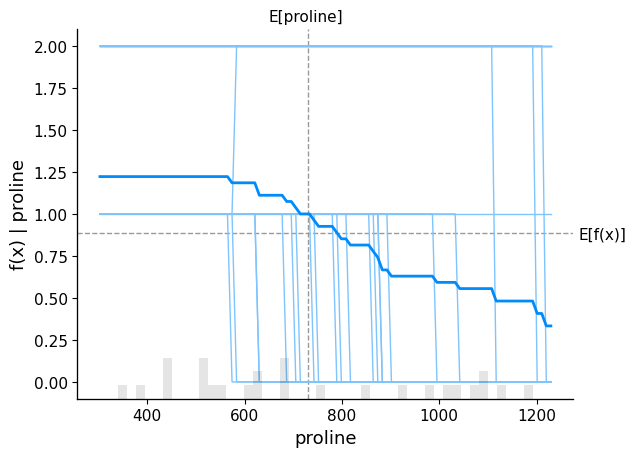

In [3]:
# Importation des bibliothèques
from flask import Flask, jsonify
import shap
import sklearn
from sklearn.datasets import load_wine
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_wine

shap.initjs()

wine = load_wine()

for line in wine.DESCR.split("\n")[5:28]:
    print(line)

boston_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
boston_df["WineType"] = wine.target

boston_df.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, Y = wine.data, wine.target

print("Total Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

print()
print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
print("Train Accuracy : ", log_reg.score(X_train, Y_train))

log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

# 3.3 Explain Predictions using SHAP Values
# 3.3.1 Create Explainer Object (LinearExplainer)

sample_idx = 0

shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])

val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

print("Expected/Base Values : ", log_reg_explainer.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", \
                      wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])


# 3.3.2 Bar Plot

shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[0], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[1], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[2], feature_names=wine.feature_names, max_display=len(wine.feature_names))

# 3.3.3 Waterfall Plot

shap_values = log_reg_explainer(X_test[:1])
shap_values.feature_names = wine.feature_names

shap_values

shap.waterfall_plot(shap_values[0][:, 0], max_display=len(wine.feature_names))

shap.waterfall_plot(shap_values[0][:, 1], max_display=len(wine.feature_names))

shap.waterfall_plot(shap_values[0][:, 2], max_display=len(wine.feature_names))

# 3.3.4 Decision Plot

shap.multioutput_decision_plot(log_reg_explainer.expected_value.tolist(),
                               log_reg_explainer.shap_values(X_test),
                               row_index=0,
                               feature_names=wine.feature_names,
                               highlight = [1]
                               )

# 3.3.5 Dependence Plot

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[0],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[1],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[2],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

# 3.3.6 Embedding Plot

shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[0], feature_names=wine.feature_names),
shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[1], feature_names=wine.feature_names),
shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[2], feature_names=wine.feature_names)

# 3.3.7 Force Plot

shap.force_plot(log_reg_explainer.expected_value[0],
                log_reg_explainer.shap_values(X_test[0])[0],
                feature_names=wine.feature_names,
                out_names="Wine Type")

shap.force_plot(log_reg_explainer.expected_value[1],
                log_reg_explainer.shap_values(X_test[0])[1],
                feature_names=wine.feature_names,
                out_names="Wine Type")


shap.force_plot(log_reg_explainer.expected_value[2],
                log_reg_explainer.shap_values(X_test[0])[2],
                feature_names=wine.feature_names,
                out_names="Wine Type")

shap.force_plot(log_reg_explainer.expected_value[0],
                log_reg_explainer.shap_values(X_test[:10])[0],
                feature_names=wine.feature_names,
                out_names="Wine Type", figsize=(25,3),
                link="identity")

# 3.3.8 Summary Plot

shap.summary_plot(log_reg_explainer.shap_values(X_test),
                  feature_names=wine.feature_names)

shap.summary_plot(log_reg_explainer.shap_values(X_test)[1],
                  features=X_test,
                  feature_names=wine.feature_names)

# 3.3.9 Partial Dependence Plot

shap.partial_dependence_plot("proline",
                             log_reg.predict,
                             data=X_test,
                             feature_names=wine.feature_names,
                             model_expected_value=True,
                             feature_expected_value=True,
                             ice=True,
                             )



In [4]:
# Importation des bibliothèques
import shap
import sklearn
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialisation de SHAP
shap.initjs()

def print_wine_description(wine):
    for line in wine.DESCR.split("\n")[5:28]:
        print(line)

def load_and_preprocess_data():
    wine = load_wine()
    boston_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    boston_df["WineType"] = wine.target

    return wine, boston_df

def train_logistic_regression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)

    return log_reg, X_test

def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
    shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
    val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
    val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
    val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

    return val1, val2, val3, shap_vals

def main():
    warnings.filterwarnings("ignore")
    
    wine, boston_df = load_and_preprocess_data()

    X, Y = wine.data, wine.target
    print("Total Data Size : ", X.shape, Y.shape)

    log_reg, X_test = train_logistic_regression(X, Y)
    print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
    print("Train Accuracy : ", log_reg.score(X_train, Y_train))

    log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

    sample_idx = 0
    val1, val2, val3, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

    print("Expected/Base Values : ", log_reg_explainer.expected_value)
    print("Shap Values for Sample %d : " % sample_idx, shap_vals)
    print("Prediction From Model                            : ", \
          wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
    print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

    # Call other functions here to generate plots or visualizations as needed

if __name__ == '__main__':
    main()


Total Data Size :  (178, 13) (178,)
Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]
Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.43033090e-01,  5.37582371e-01, -2.78876791e-02,  8.44331083e-01,
       -2.05871551e-01,  6.10961402e-02,  7.72315337e-02,  8.73815387e-04,
       -1.71108134e-01,  2.53299943e+00, -1.48331138e-02,  2.21826218e-01,
        3.37846470e+00]), array([ 3.16124852e-01, -3.59491099e-01,  7.78668225e-04,  4.63805066e-02,
       -2.95169337e-01, -1.15943908e-01, -1.70349810e-01,  3.92037210e-04,
        2.21248695e-01, -2.46994744e+00,  1.48968024e-02, -4.03850262e-01,
       -3.08852148e-01])]
Prediction From Model                         

Total Data Size :  (178, 13) (178,)
Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]
Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.43033090e-01,  5.37582371e-01, -2.78876791e-02,  8.44331083e-01,
       -2.05871551e-01,  6.10961402e-02,  7.72315337e-02,  8.73815387e-04,
       -1.71108134e-01,  2.53299943e+00, -1.48331138e-02,  2.21826218e-01,
        3.37846470e+00]), array([ 3.16124852e-01, -3.59491099e-01,  7.78668225e-04,  4.63805066e-02,
       -2.95169337e-01, -1.15943908e-01, -1.70349810e-01,  3.92037210e-04,
        2.21248695e-01, -2.46994744e+00,  1.48968024e-02, -4.03850262e-01,
       -3.08852148e-01])]
Prediction From Model                         

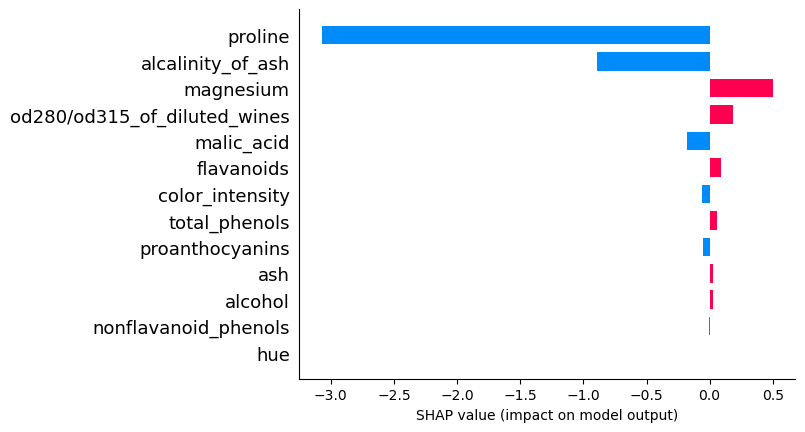

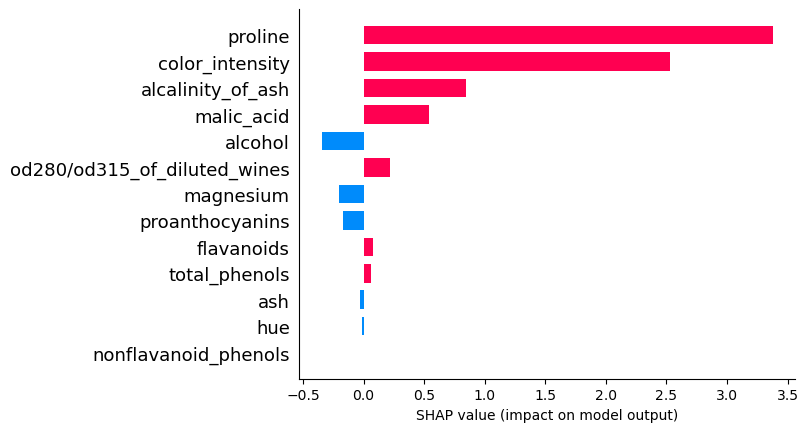

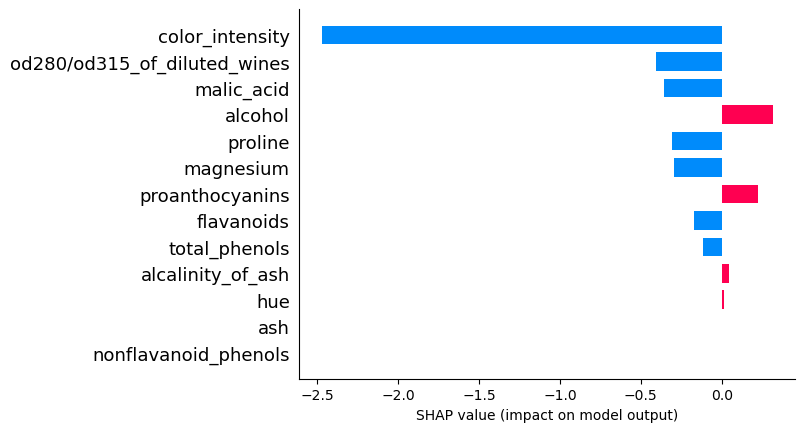

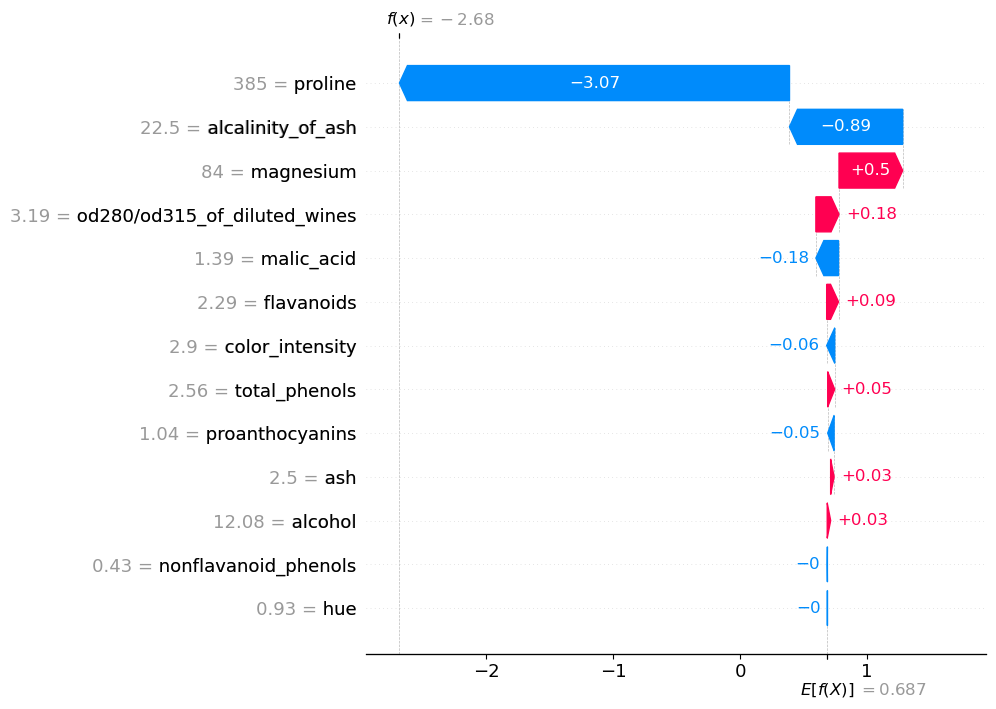

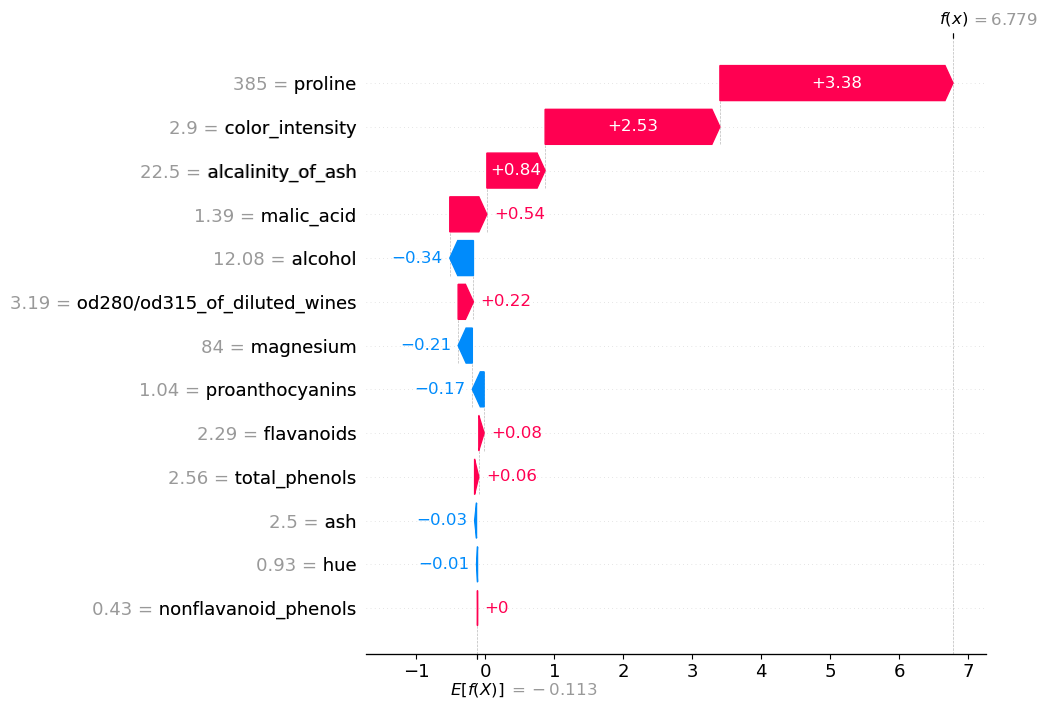

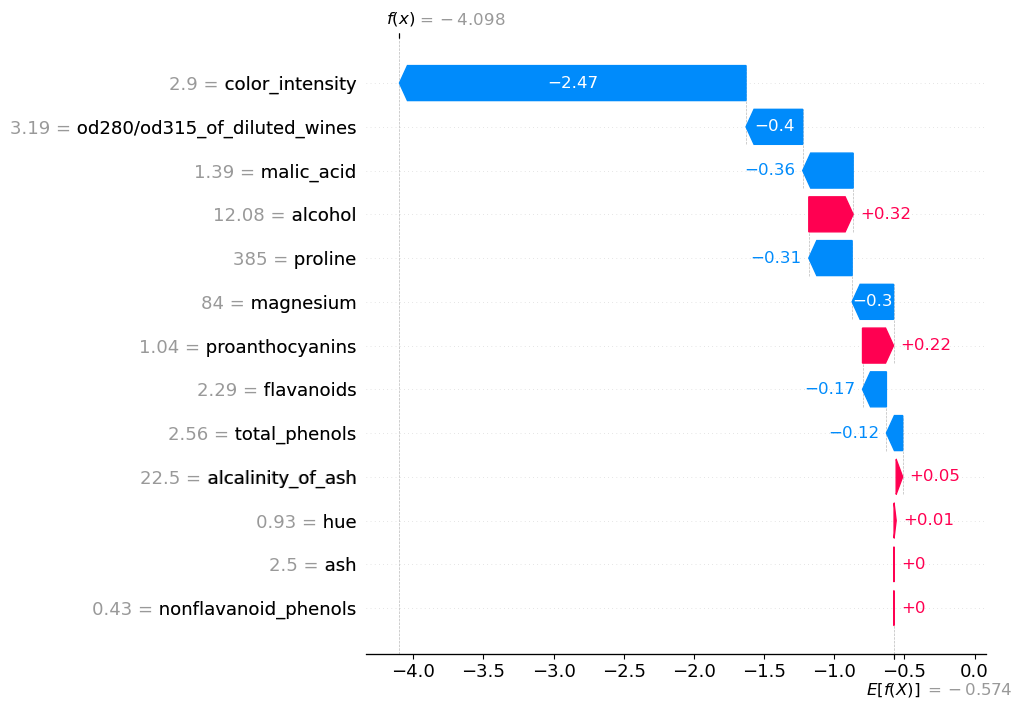

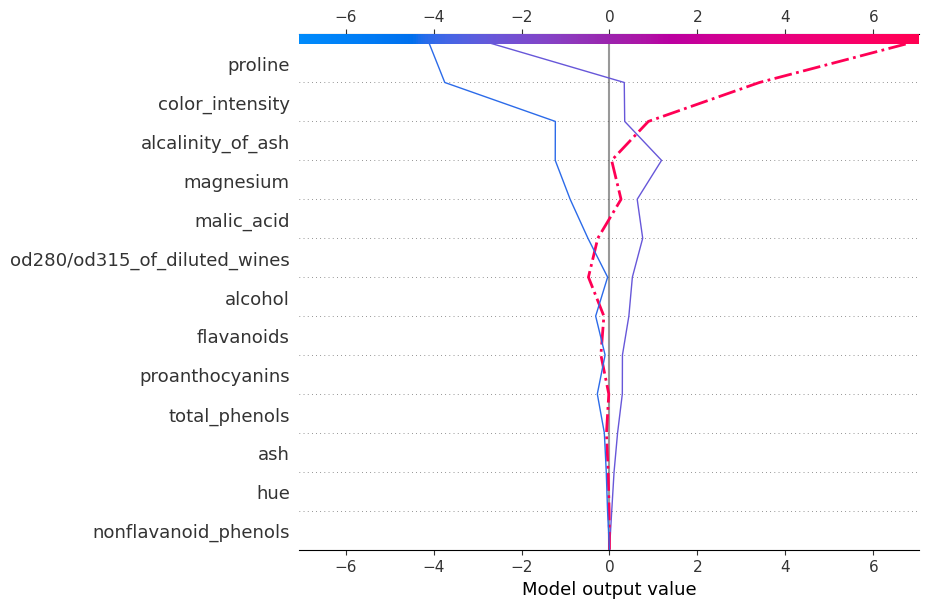

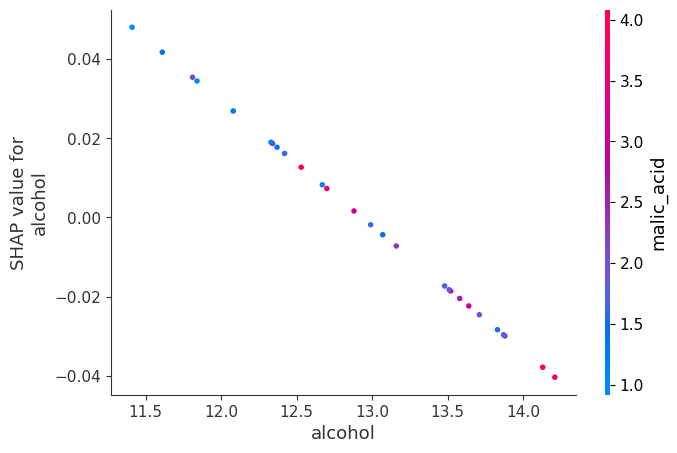

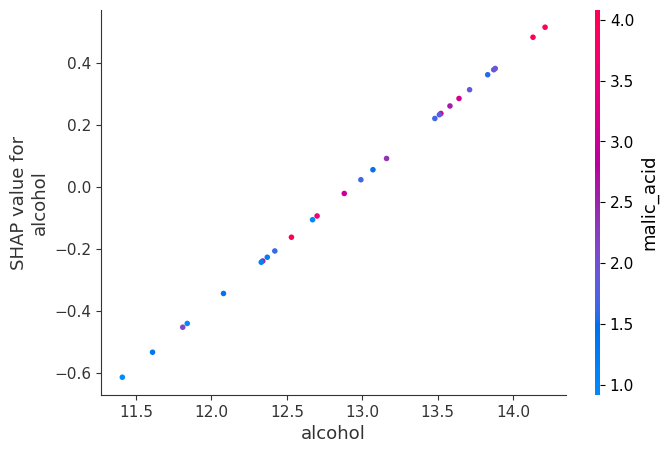

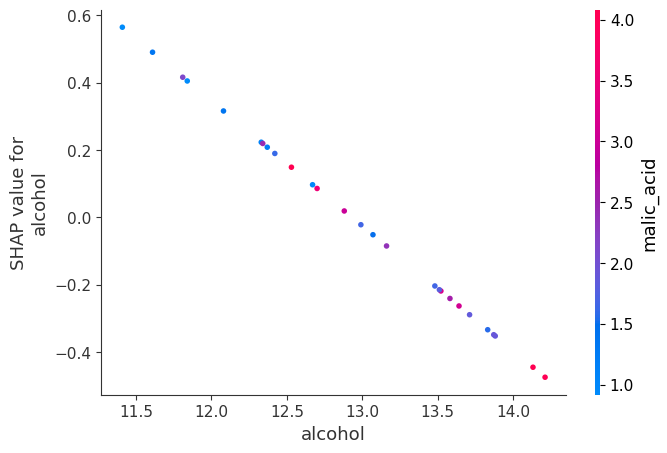

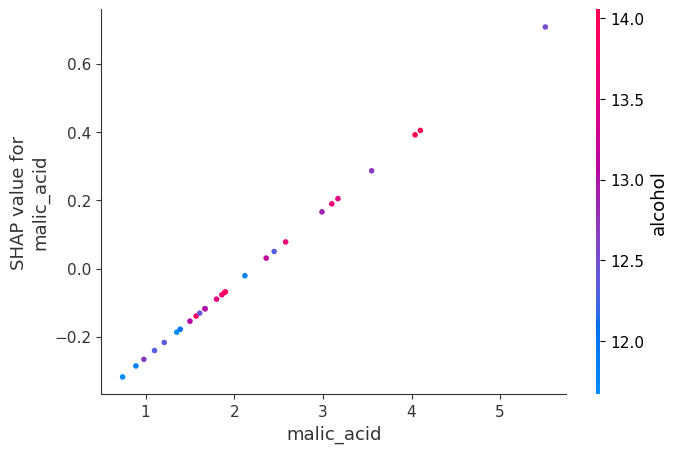

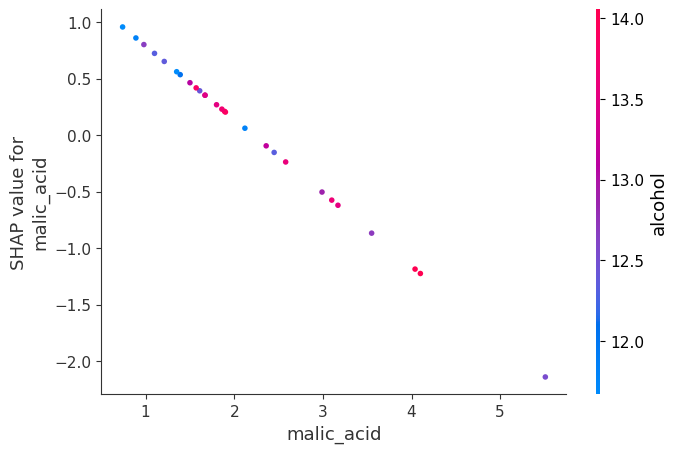

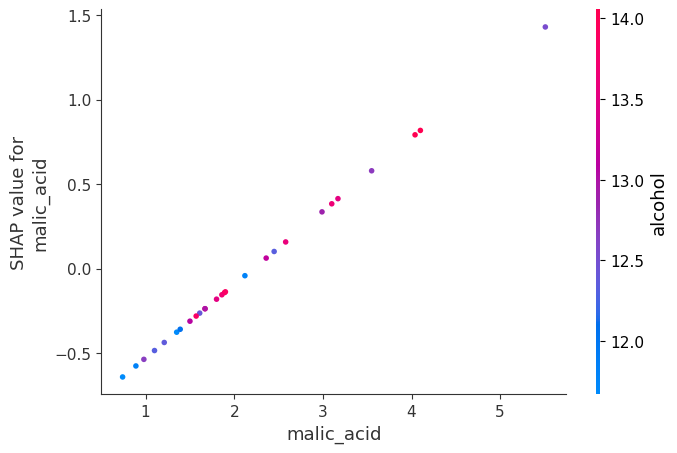

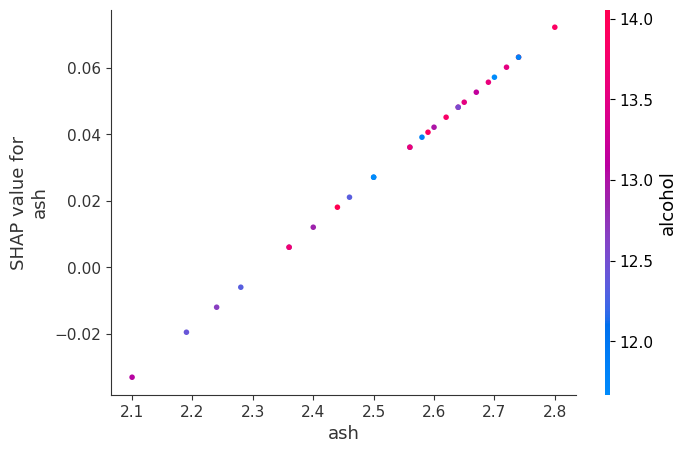

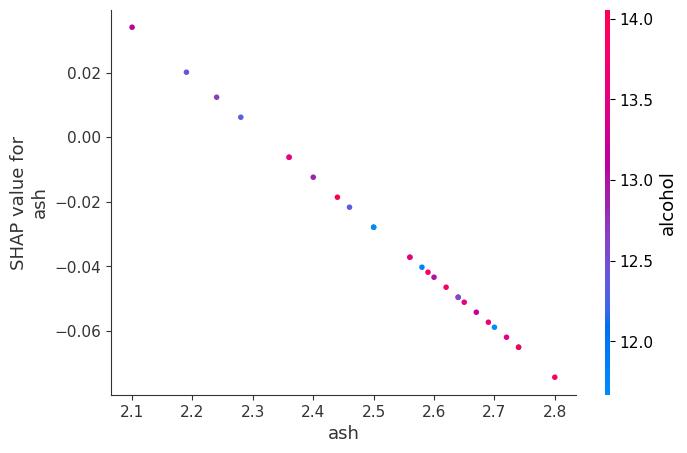

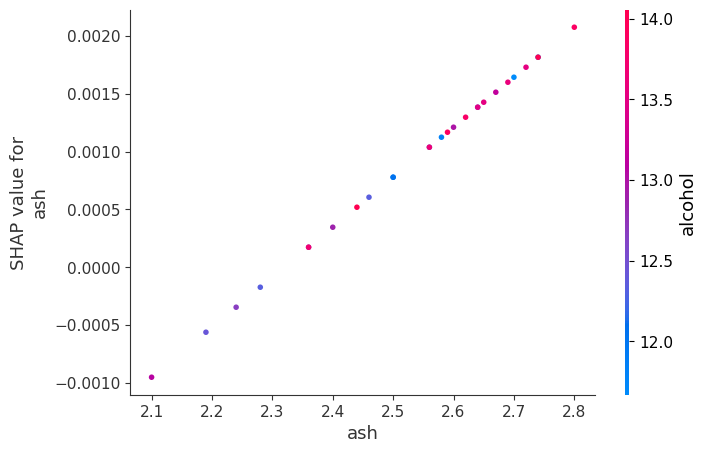

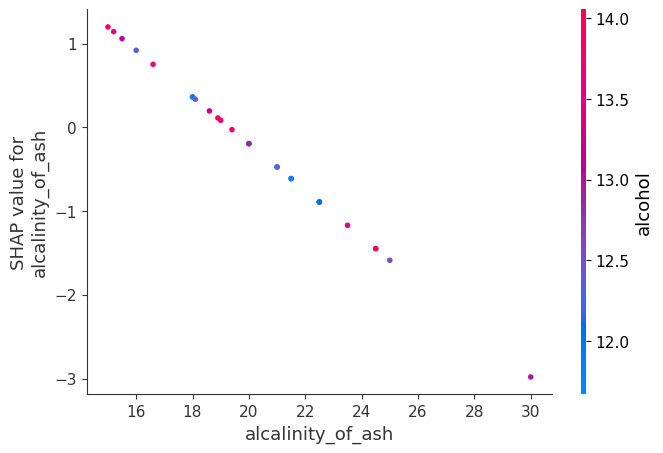

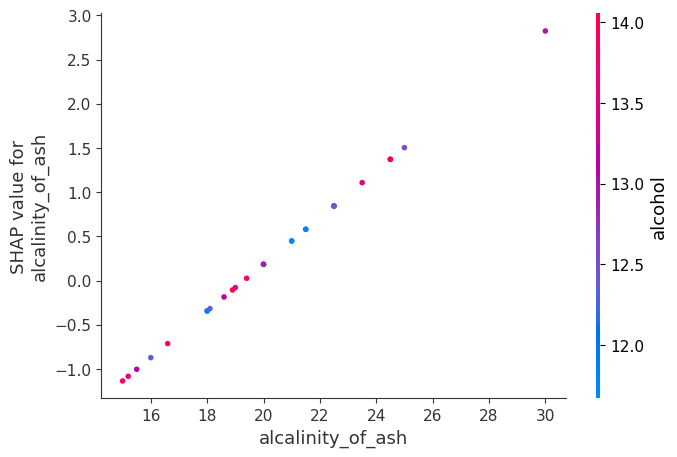

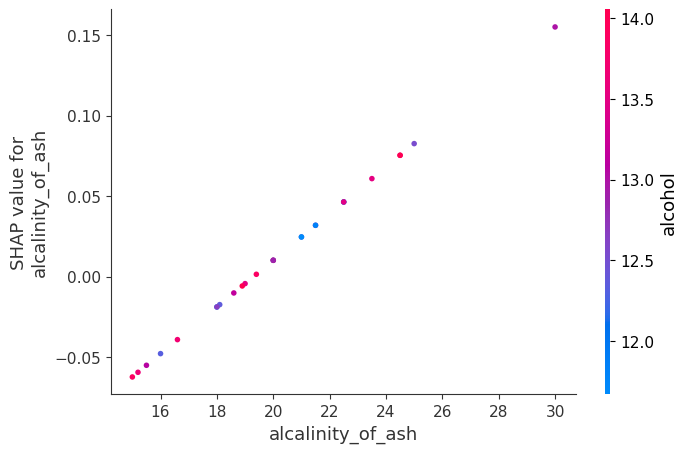

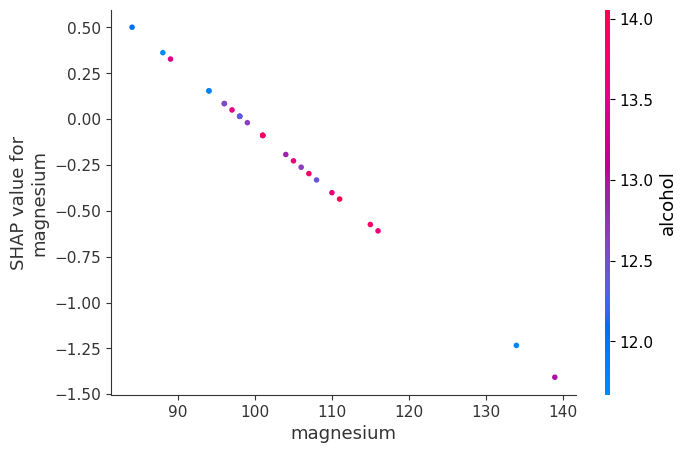

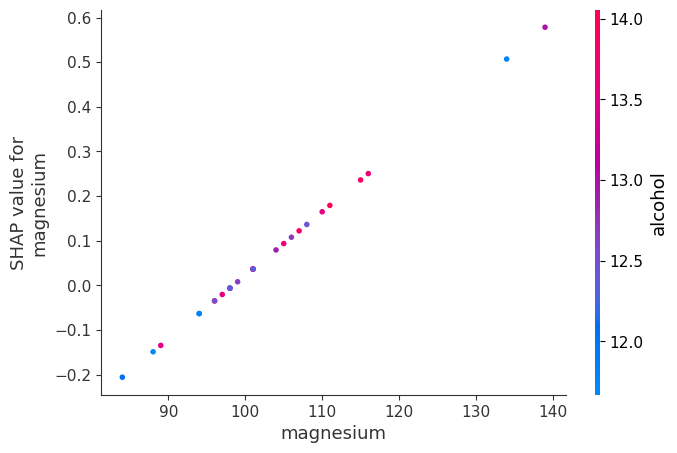

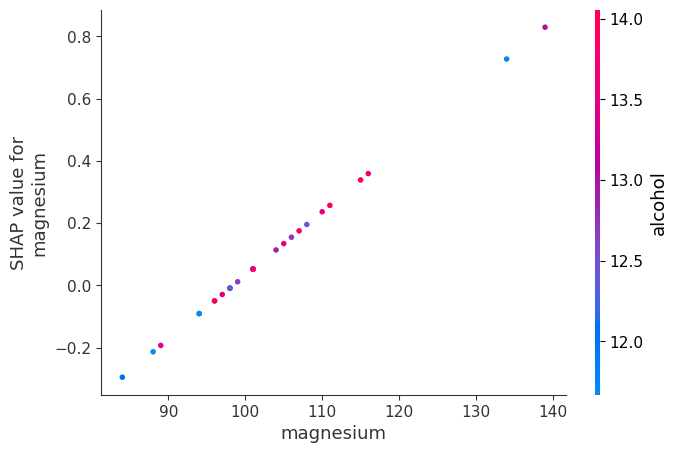

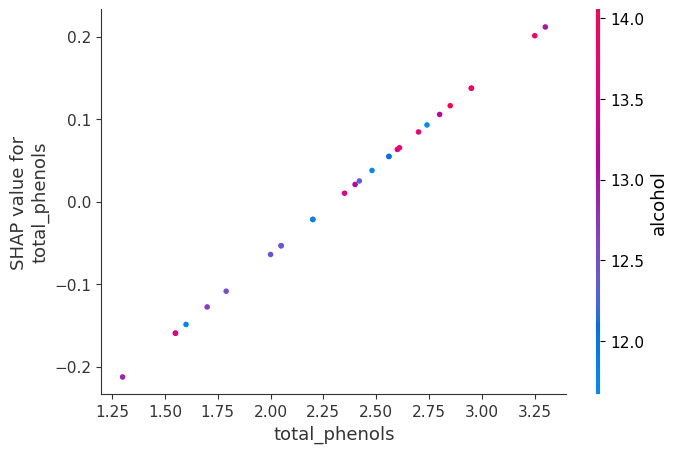

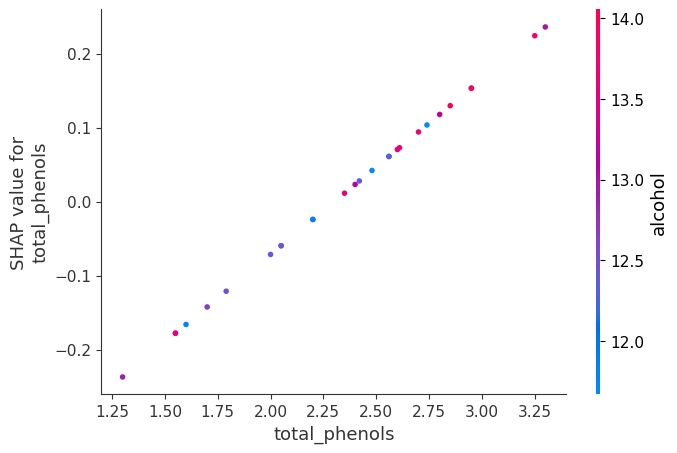

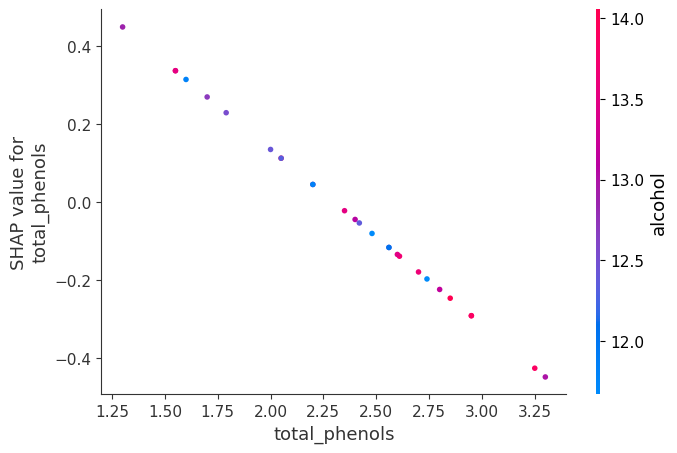

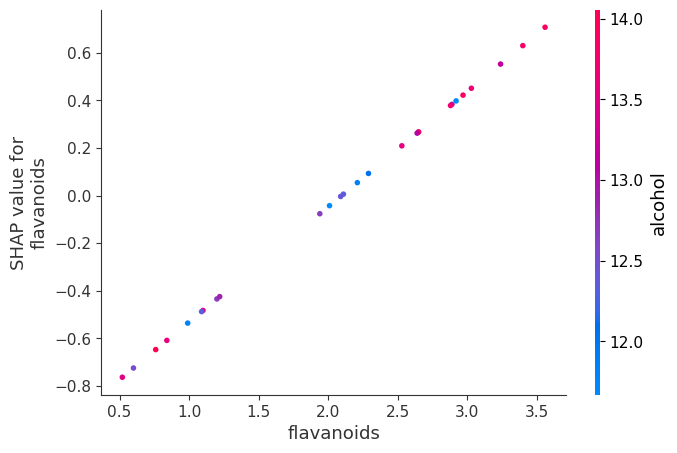

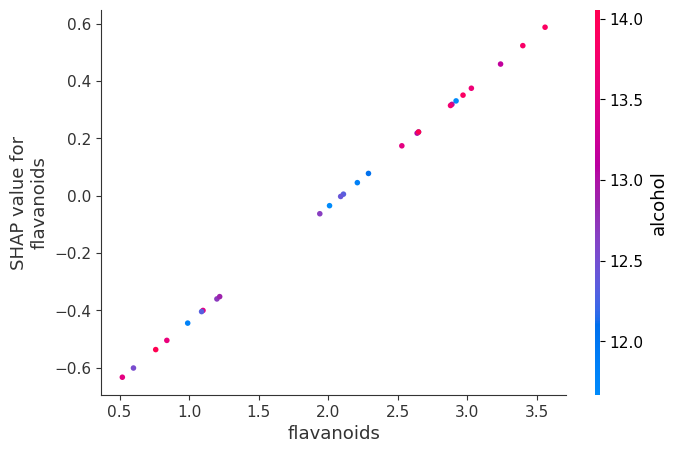

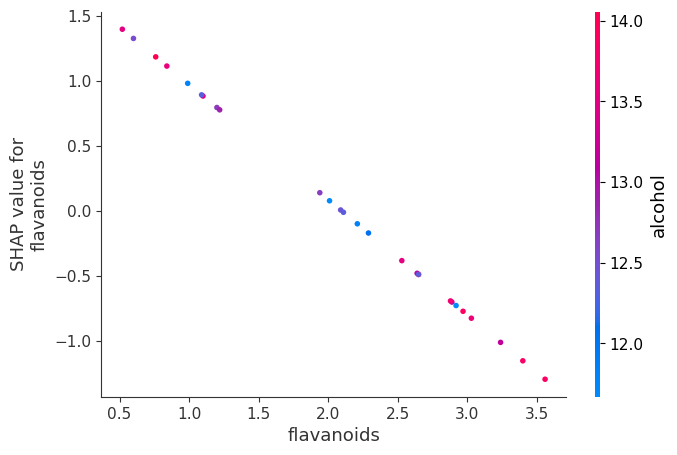

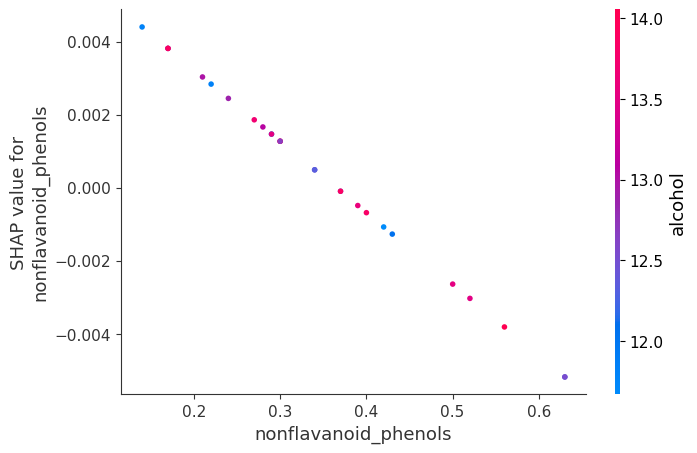

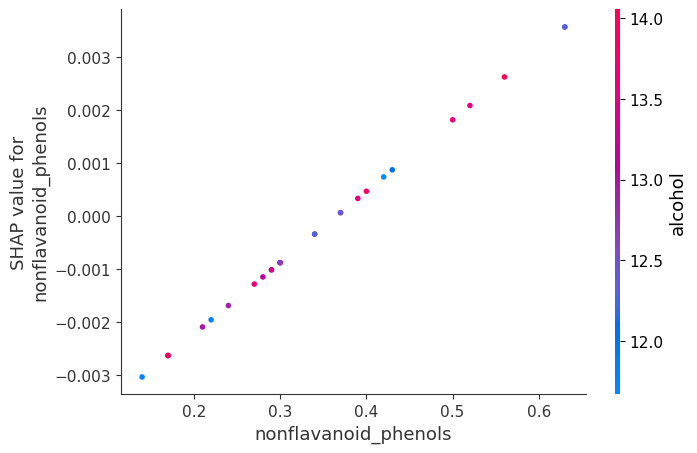

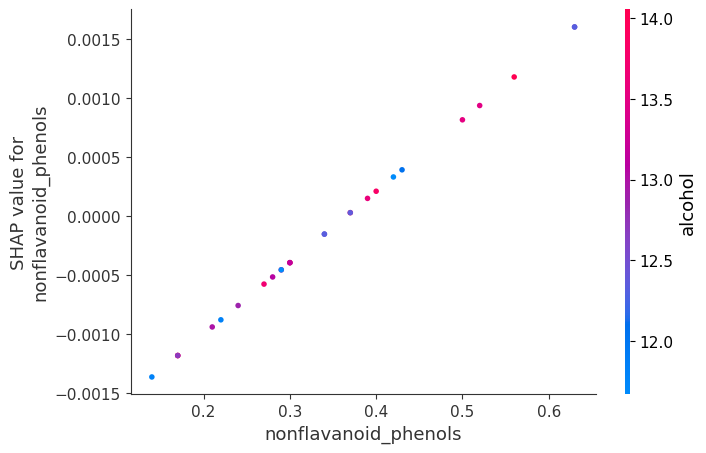

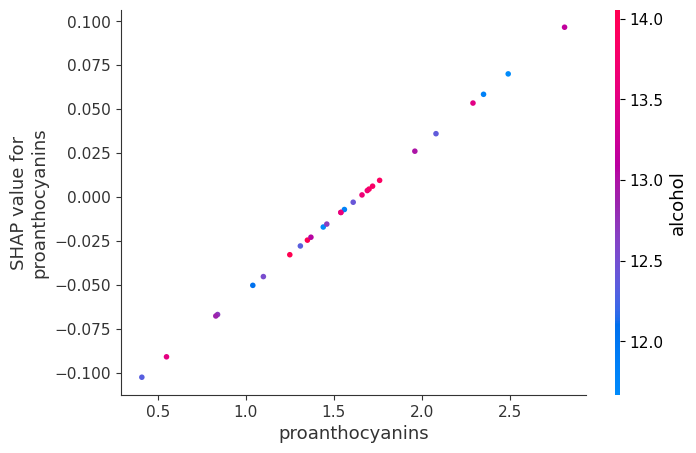

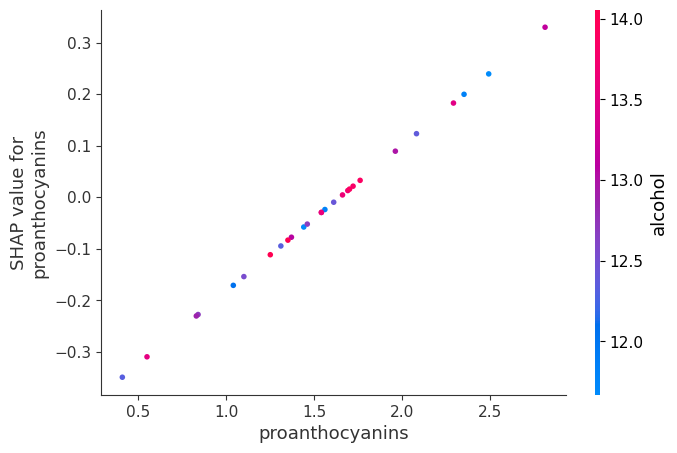

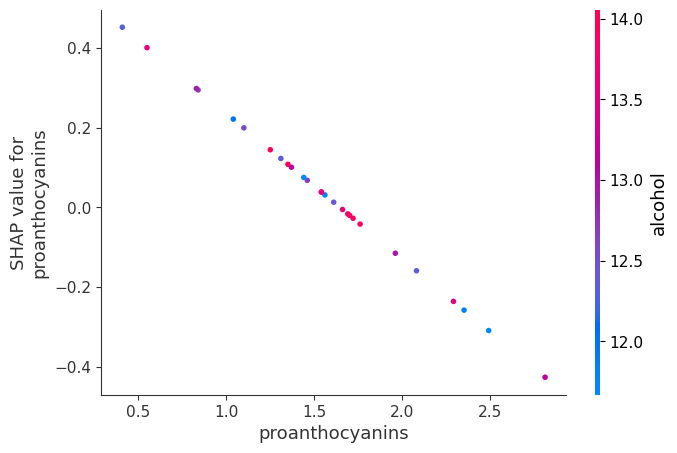

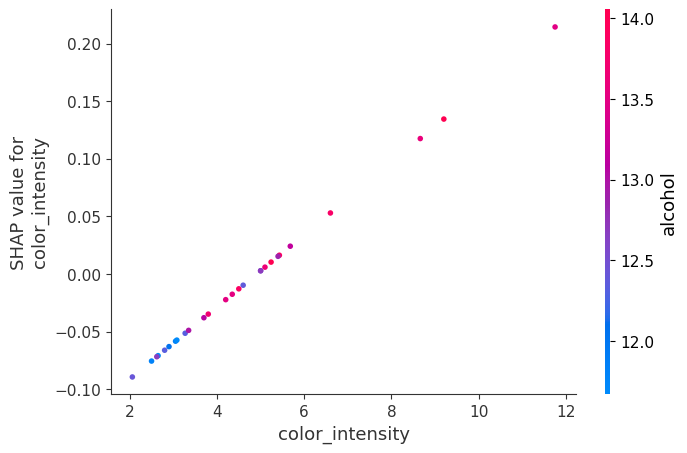

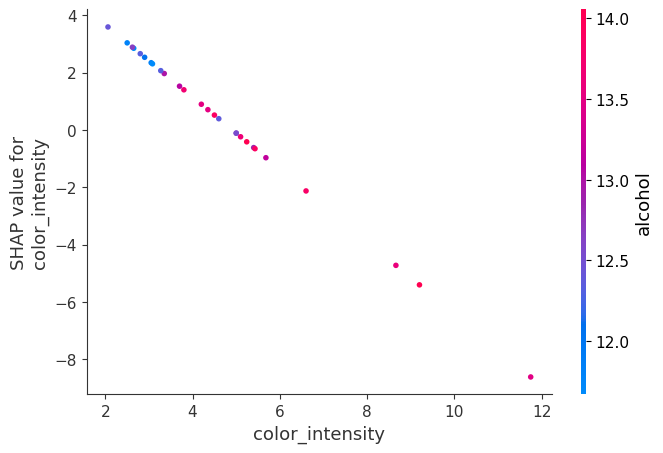

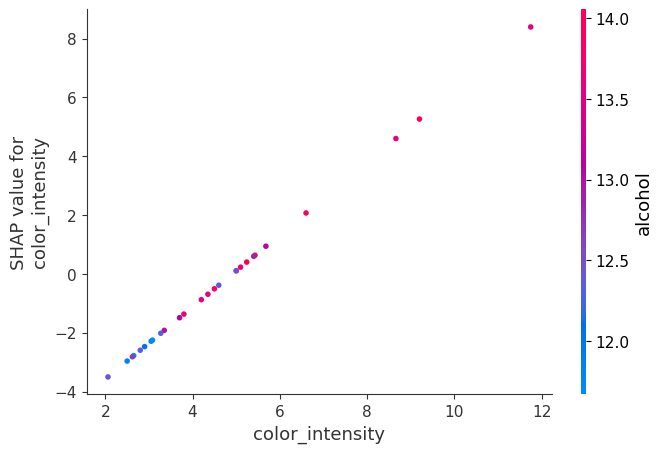

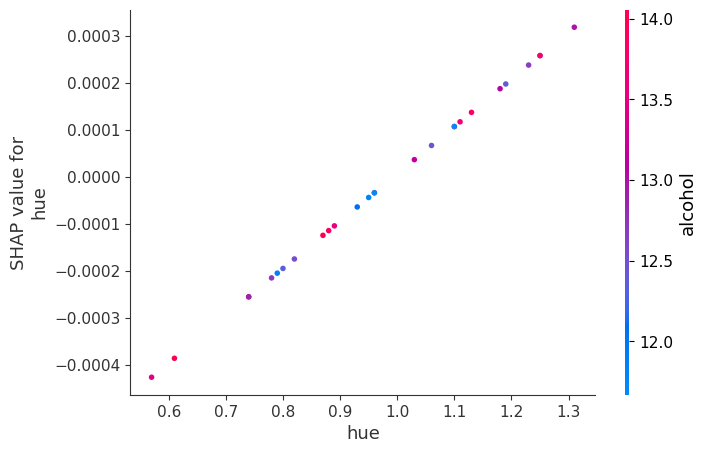

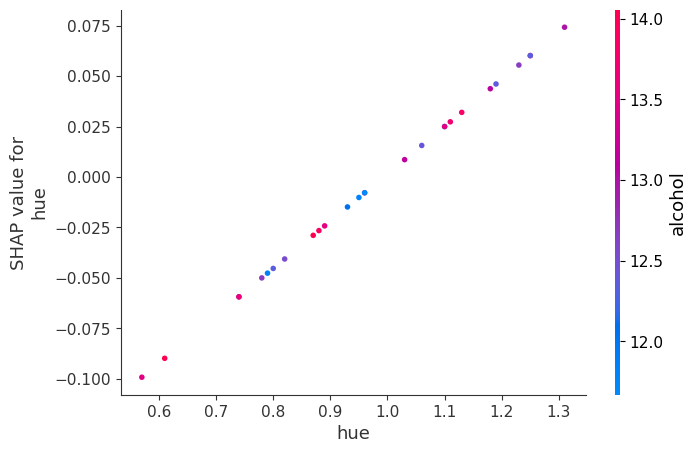

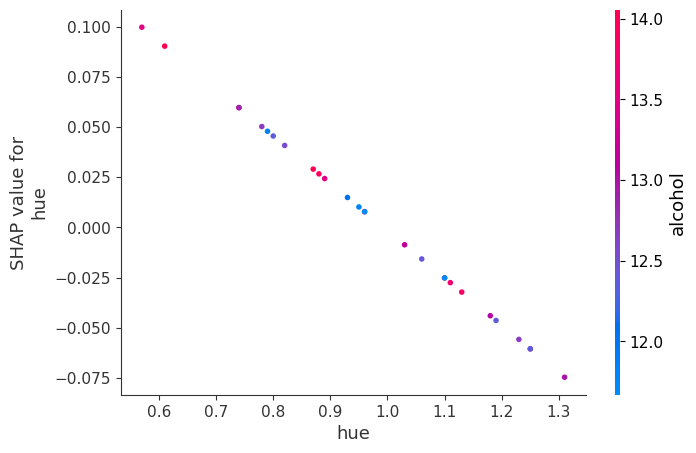

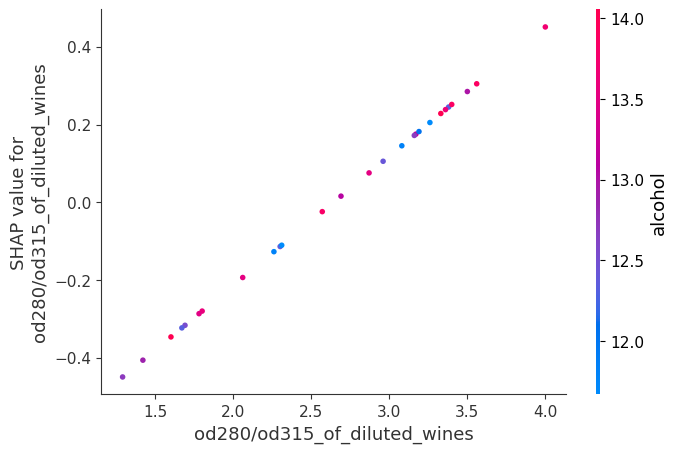

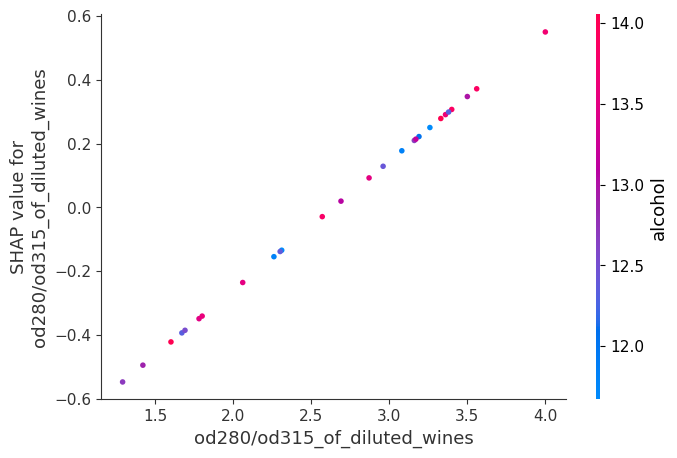

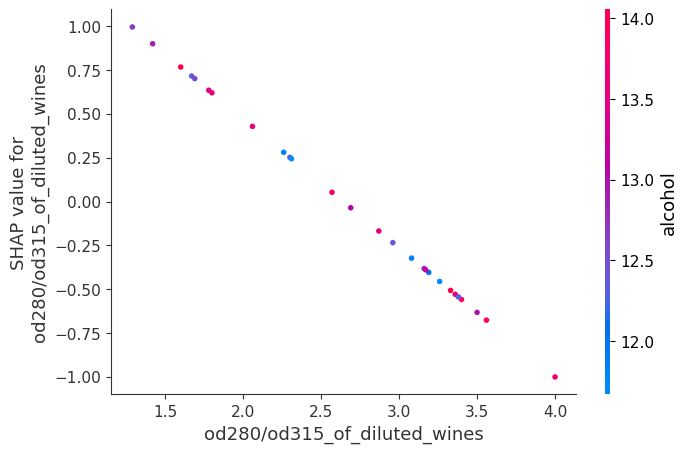

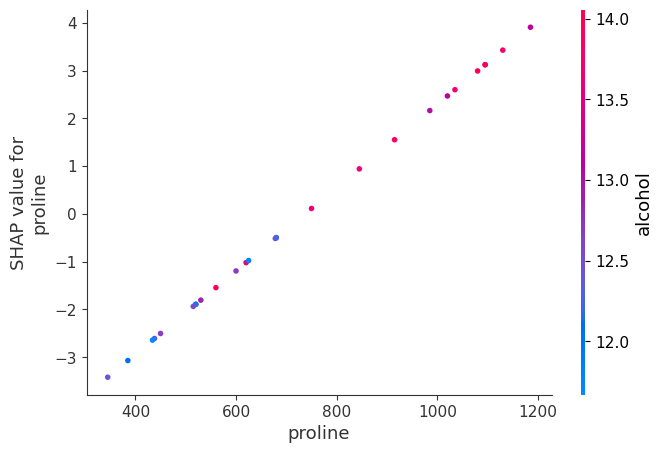

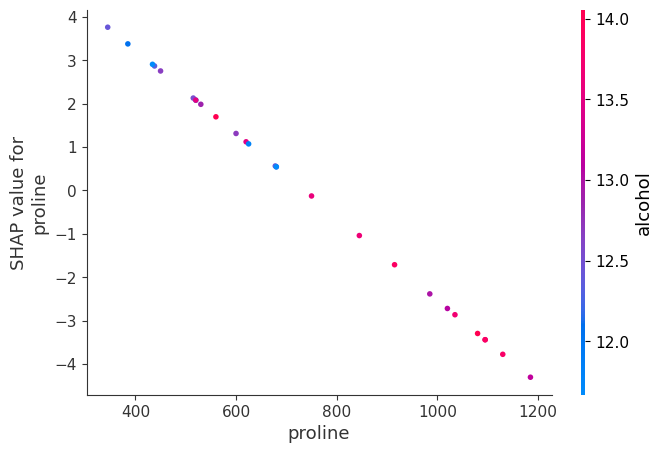

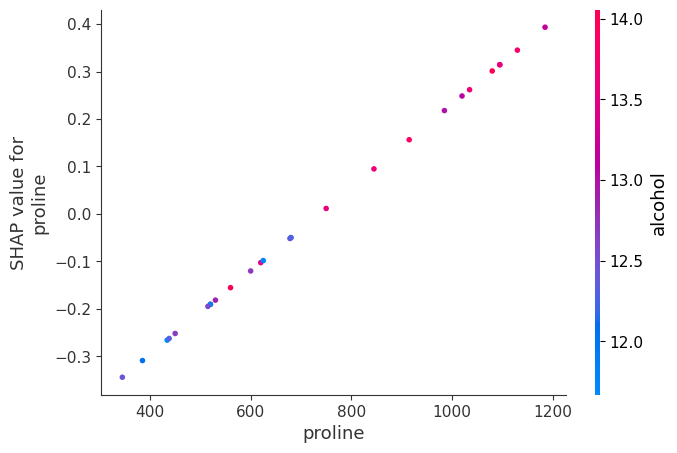

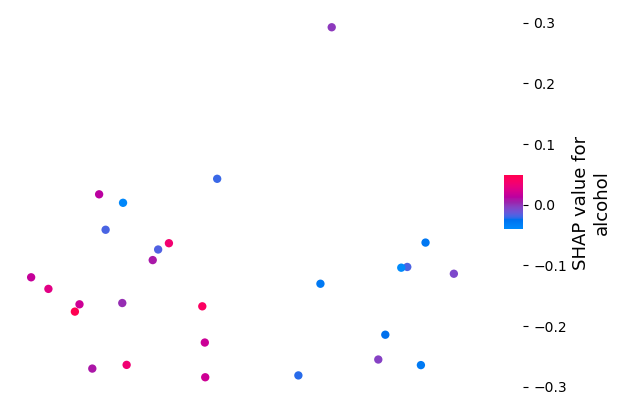

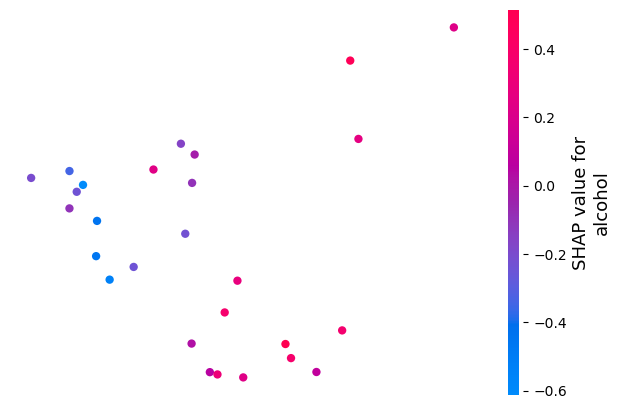

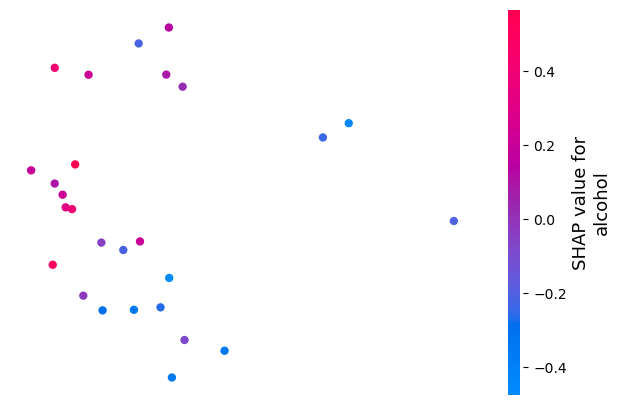

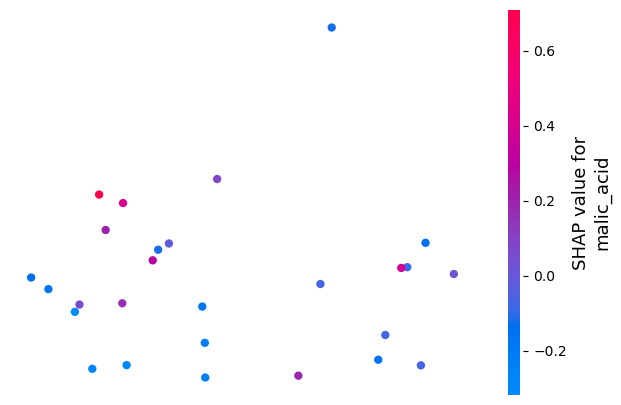

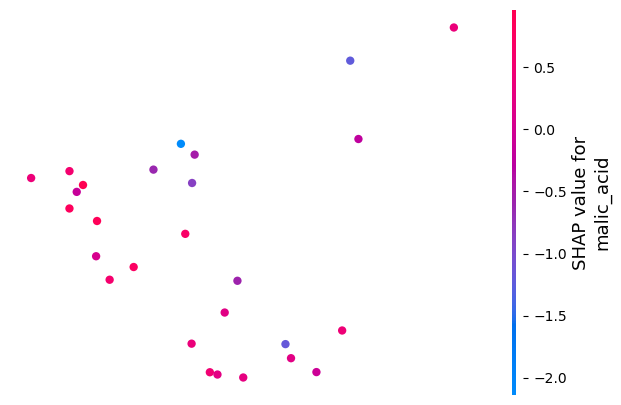

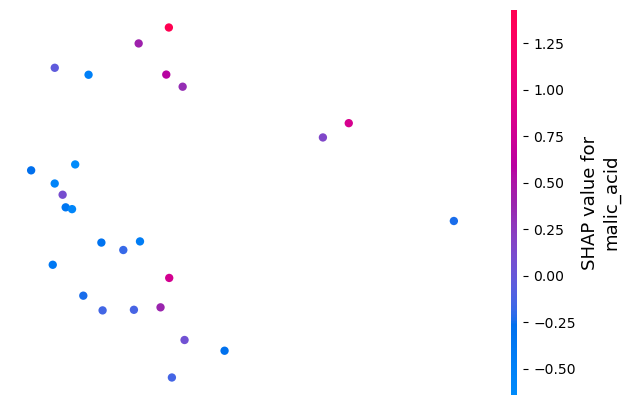

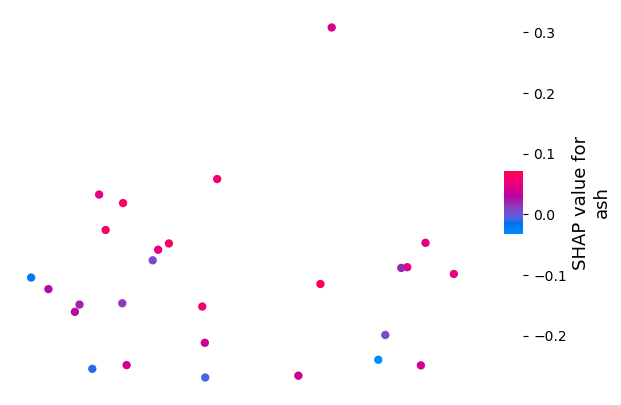

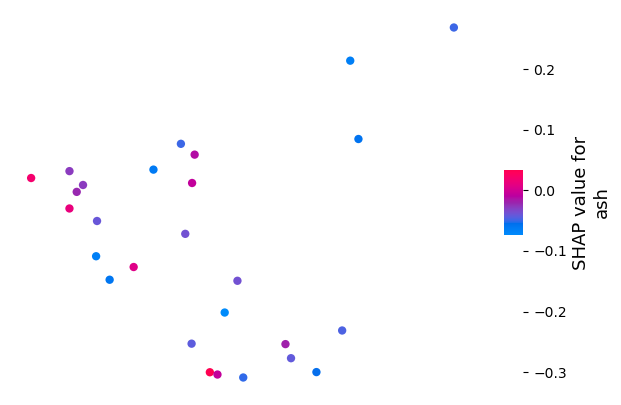

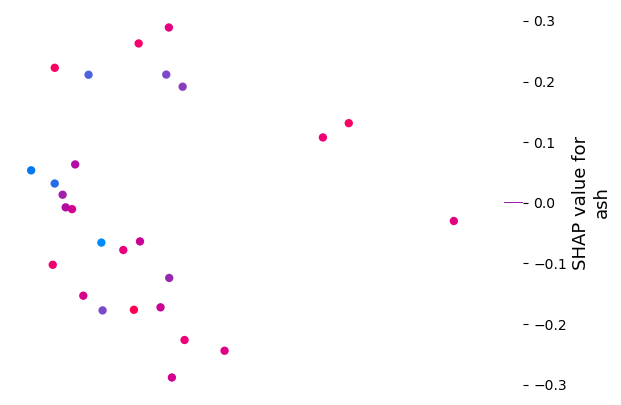

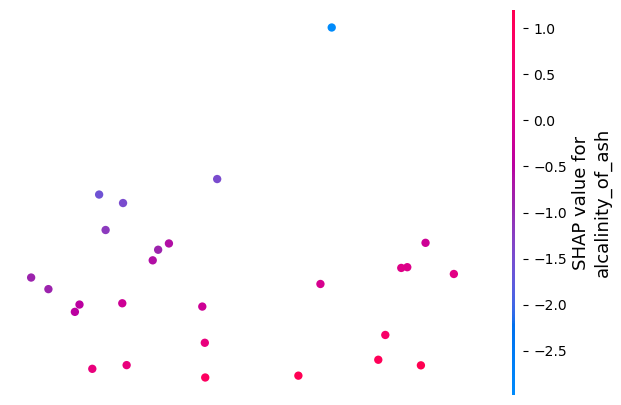

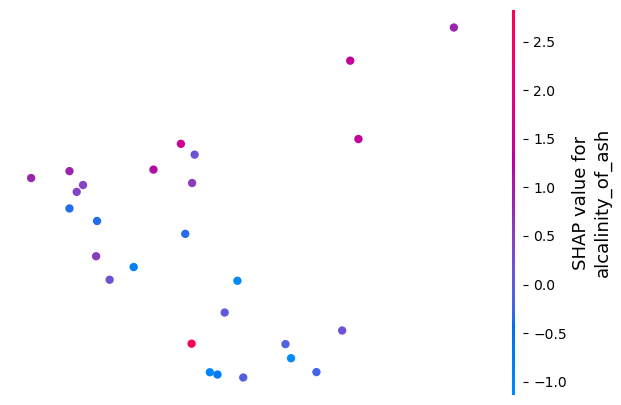

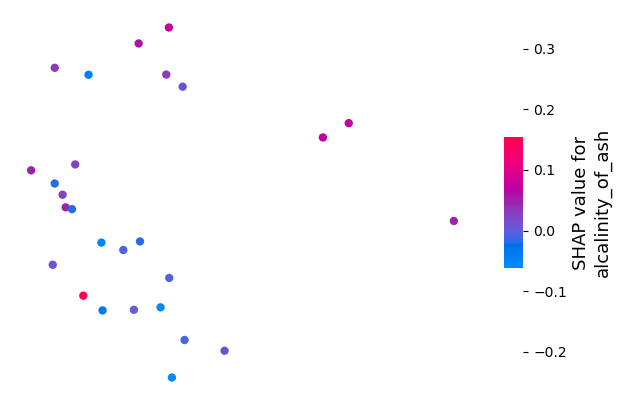

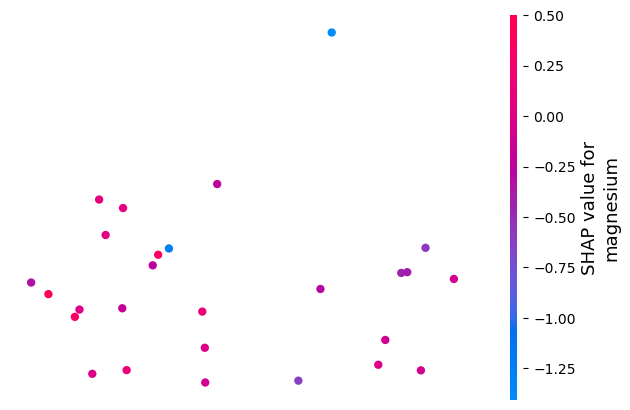

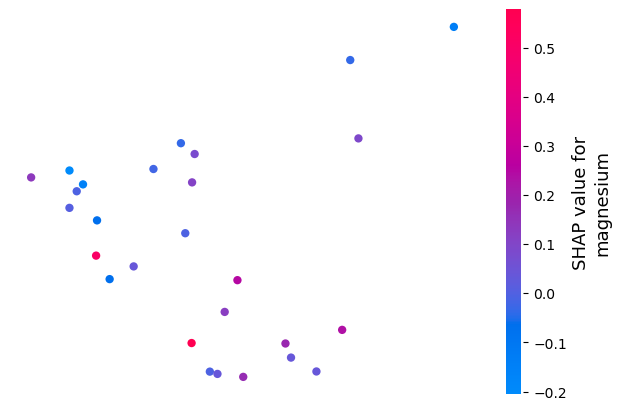

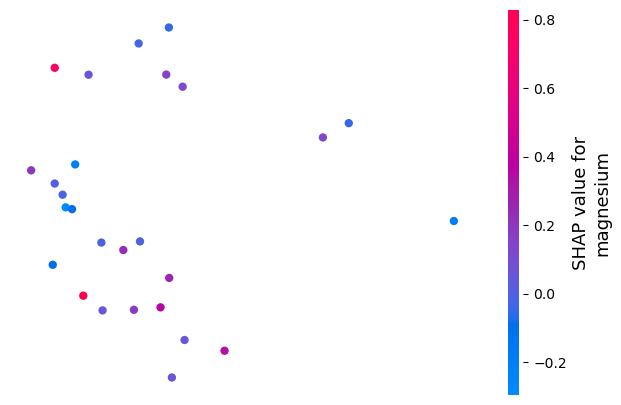

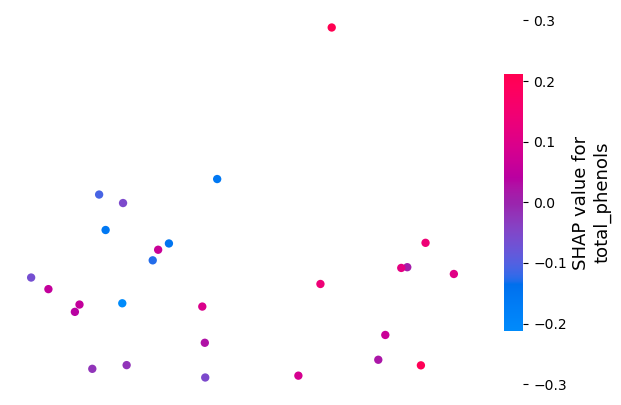

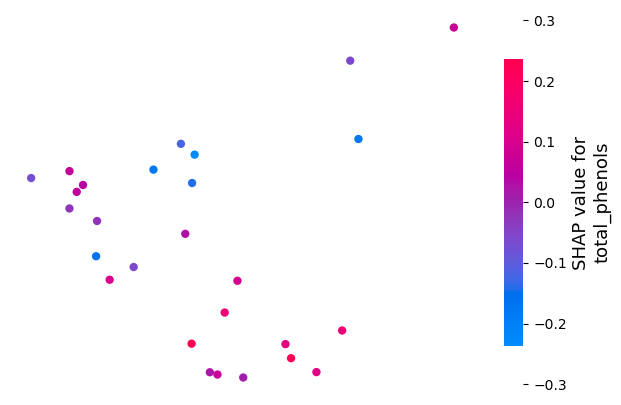

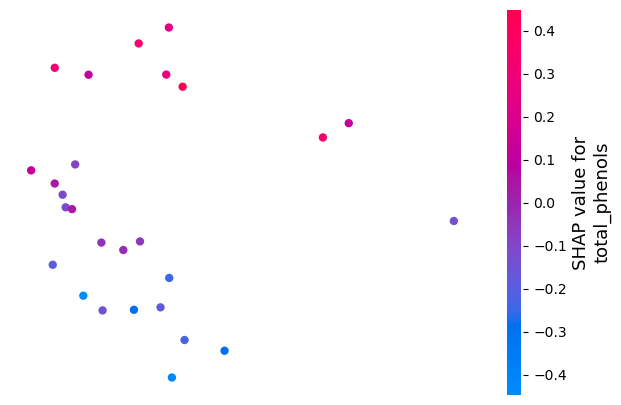

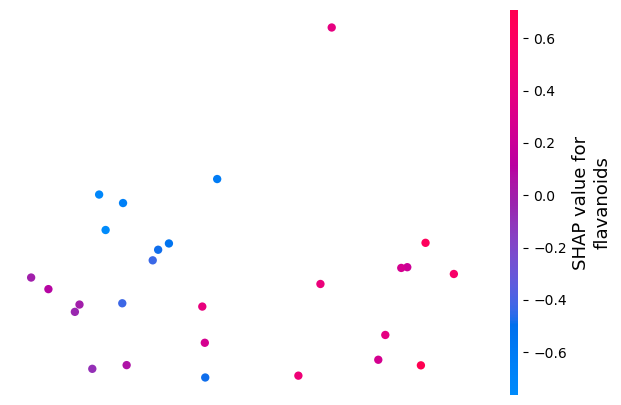

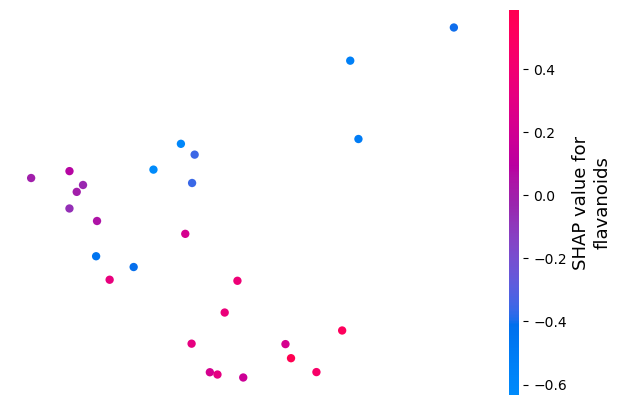

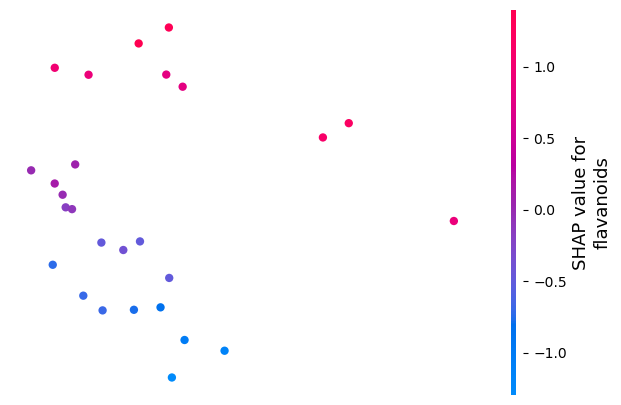

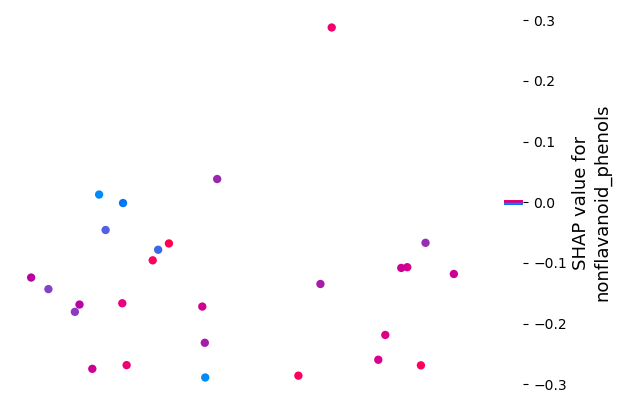

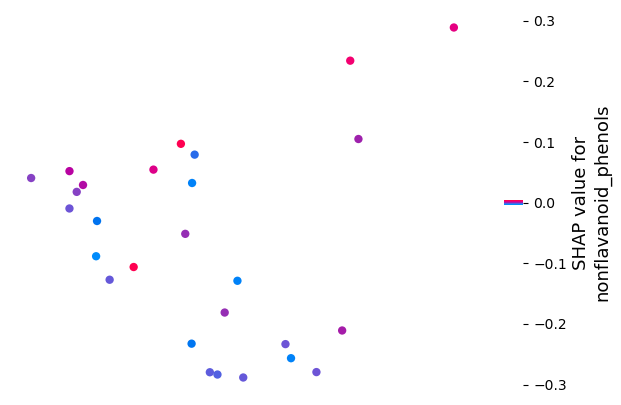

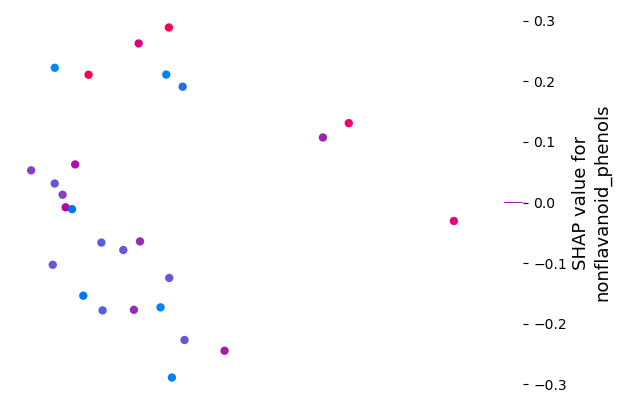

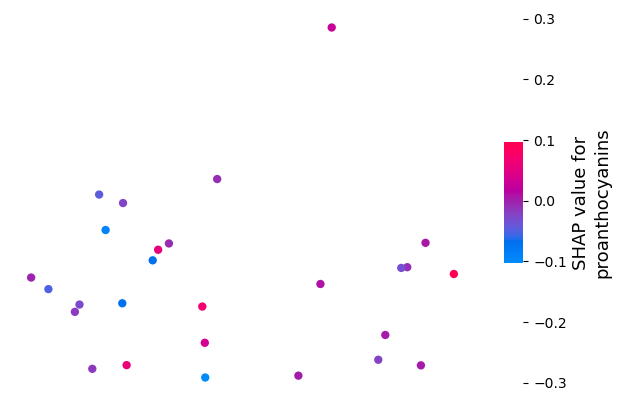

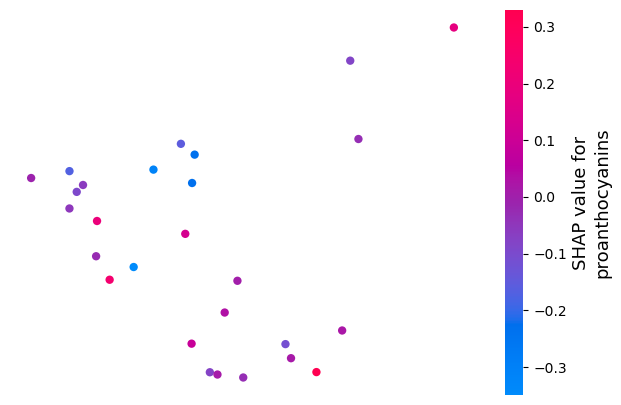

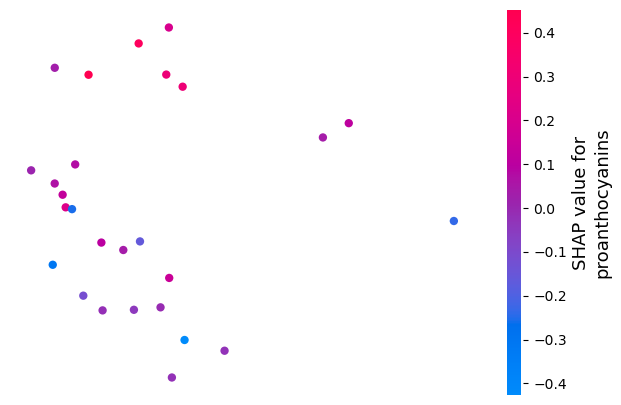

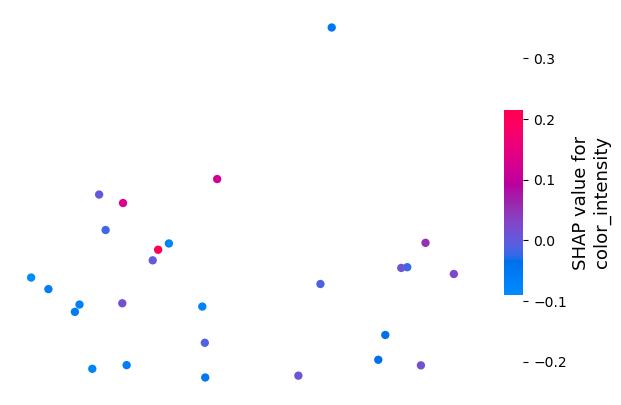

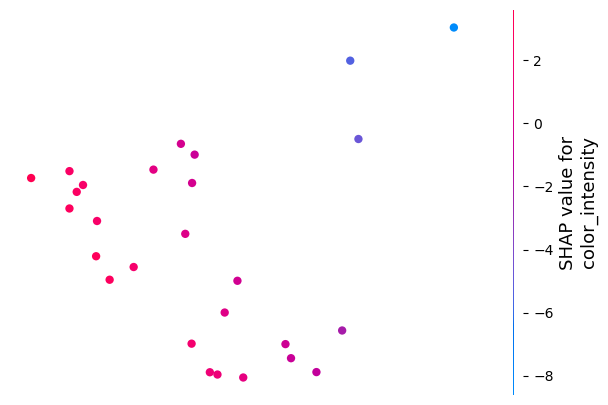

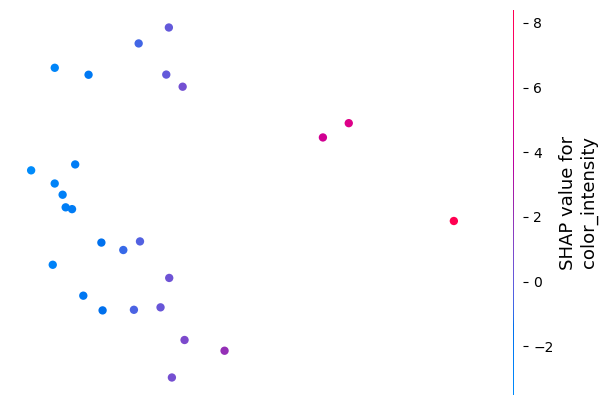

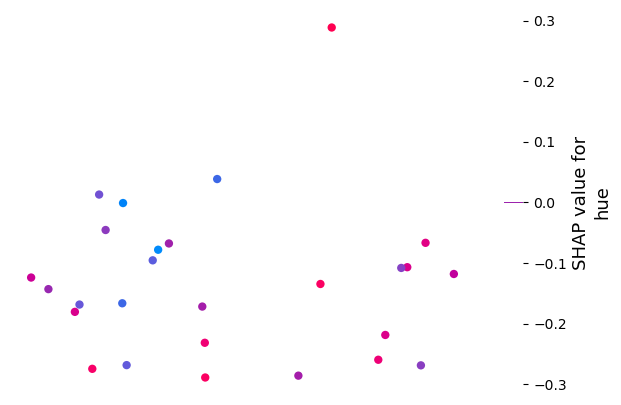

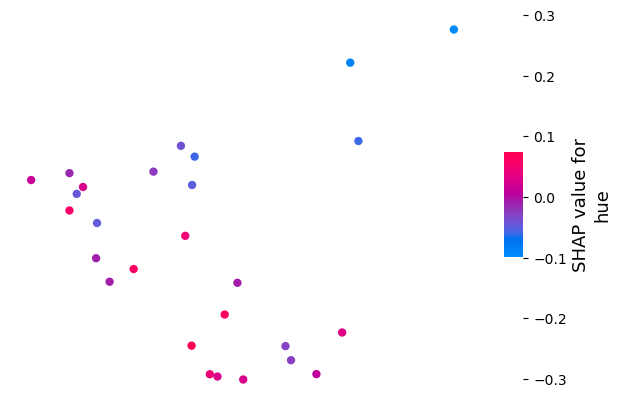

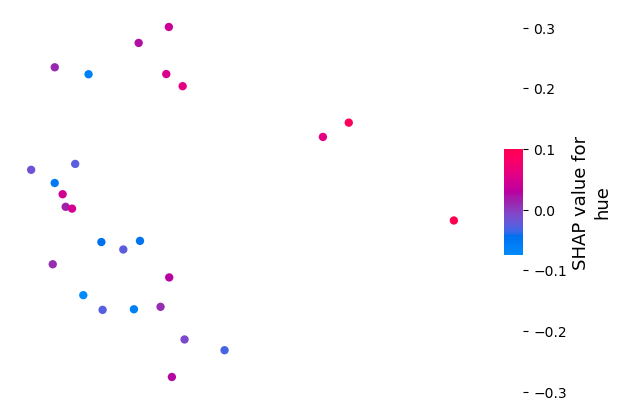

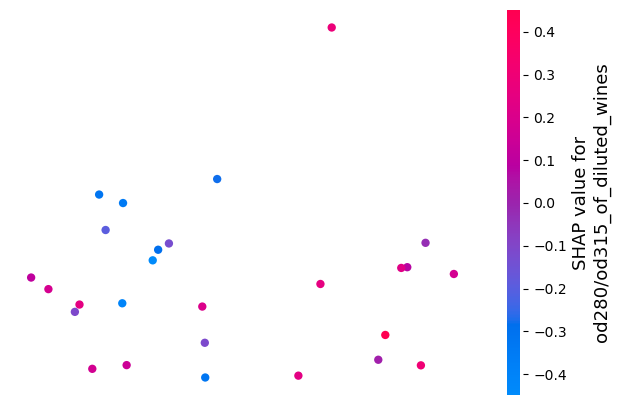

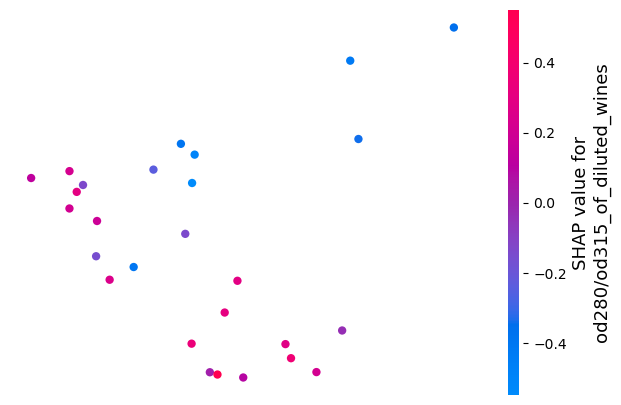

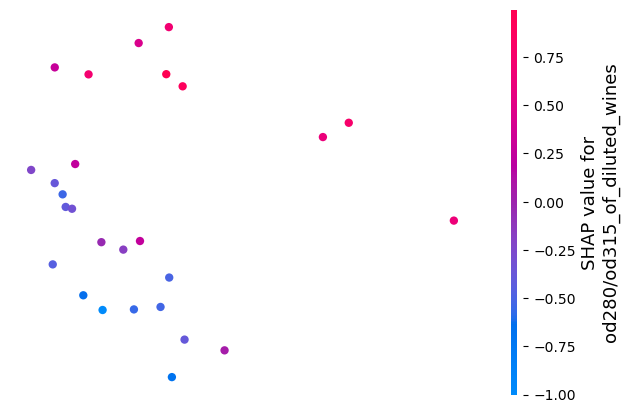

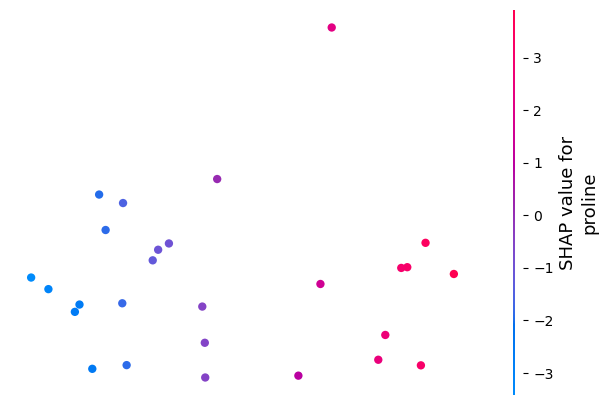

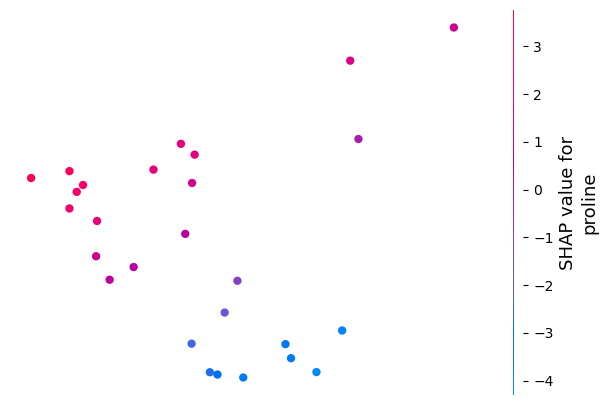

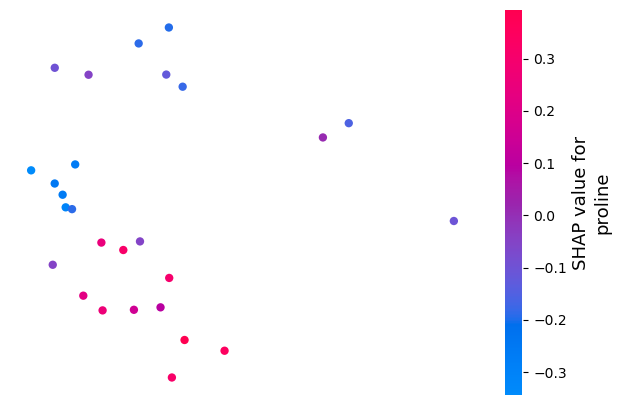

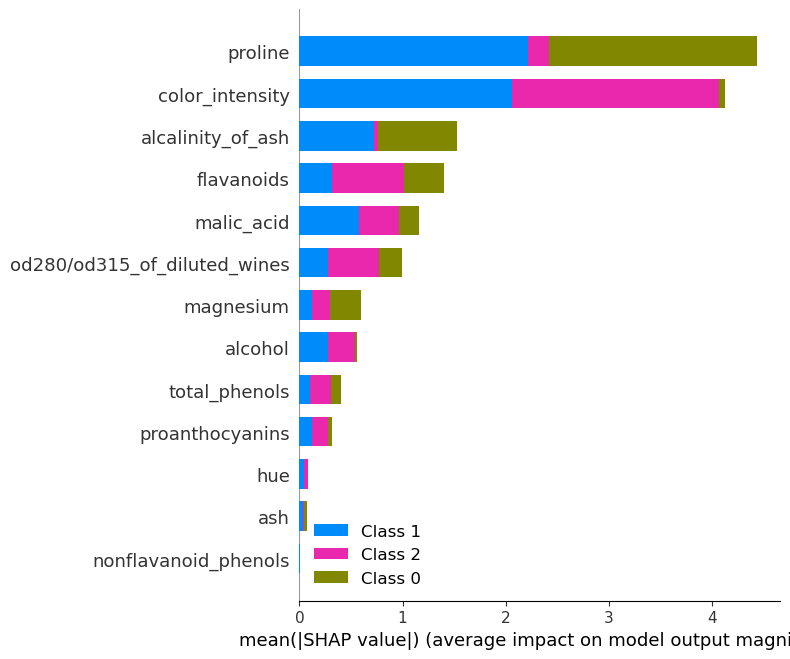

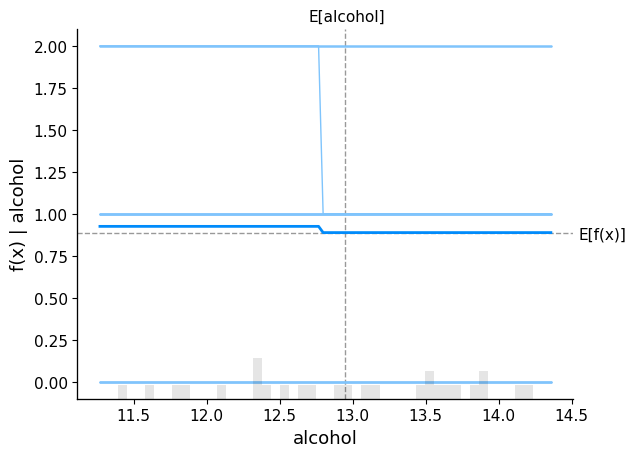

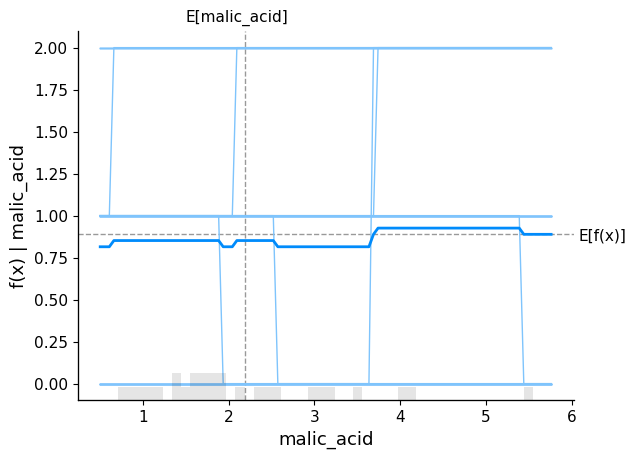

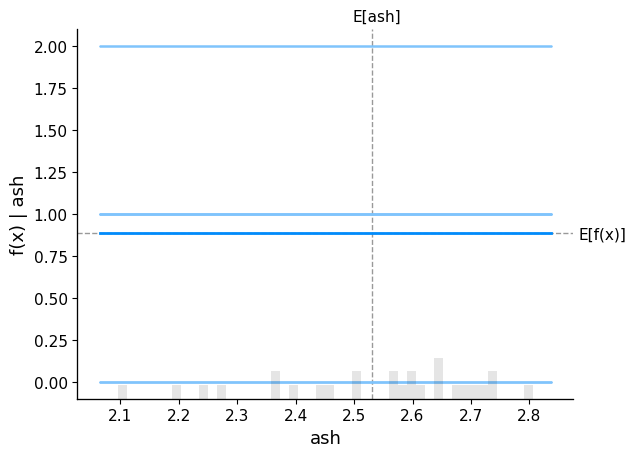

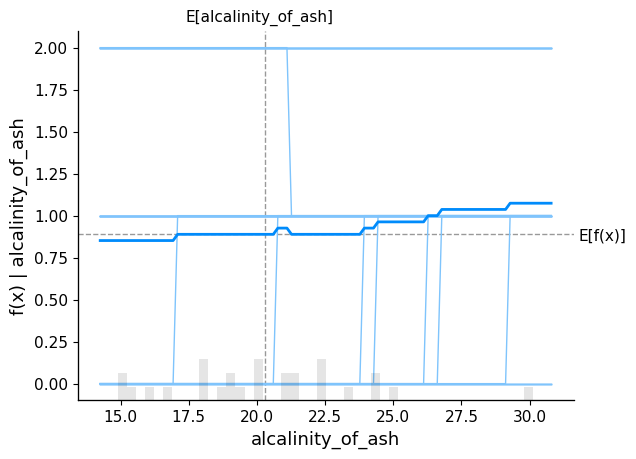

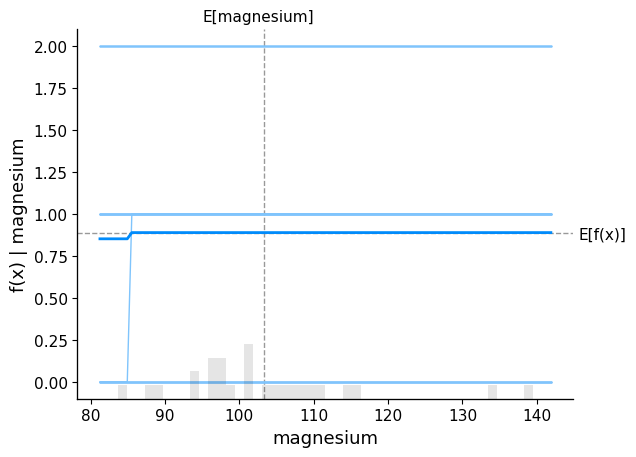

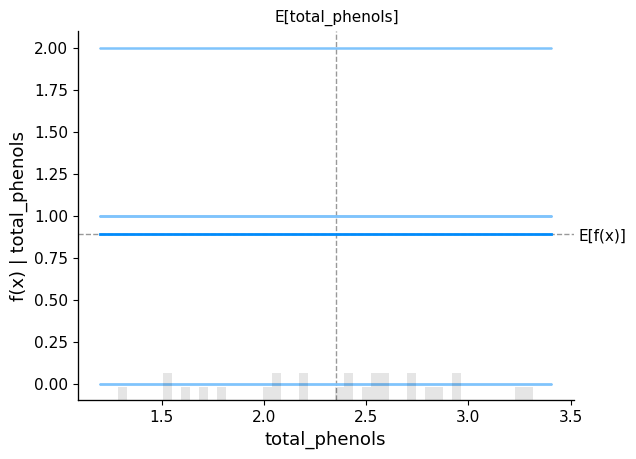

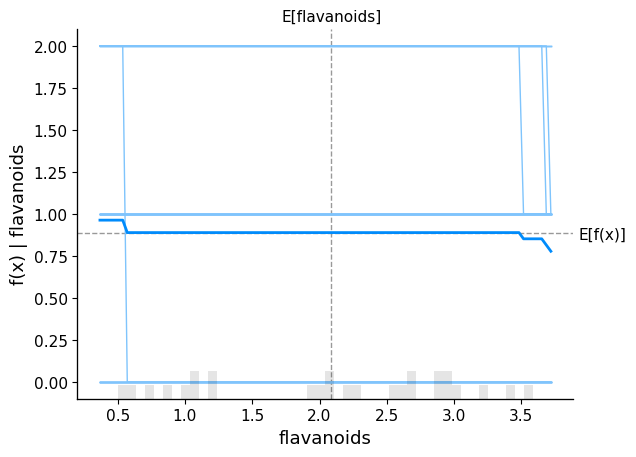

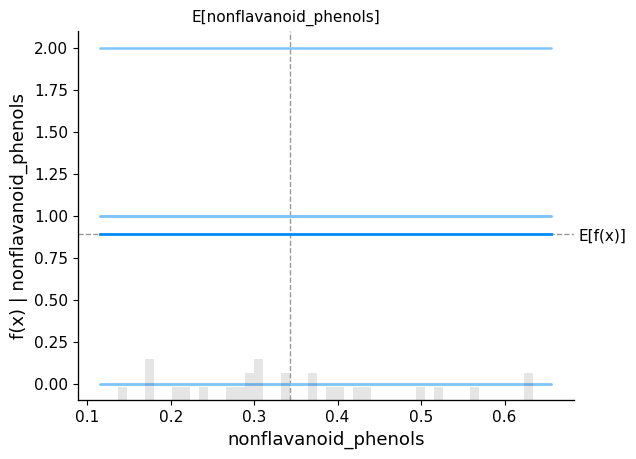

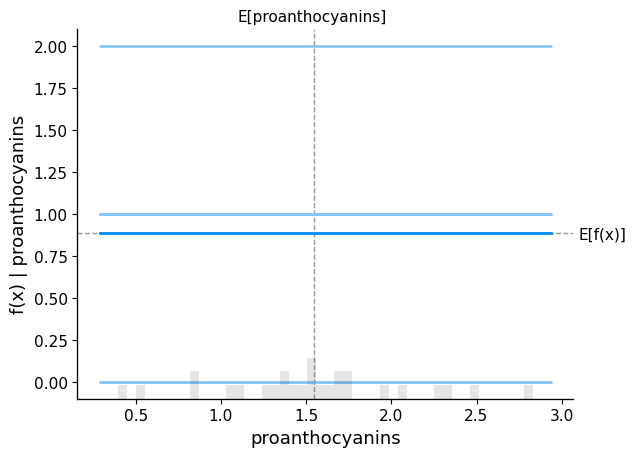

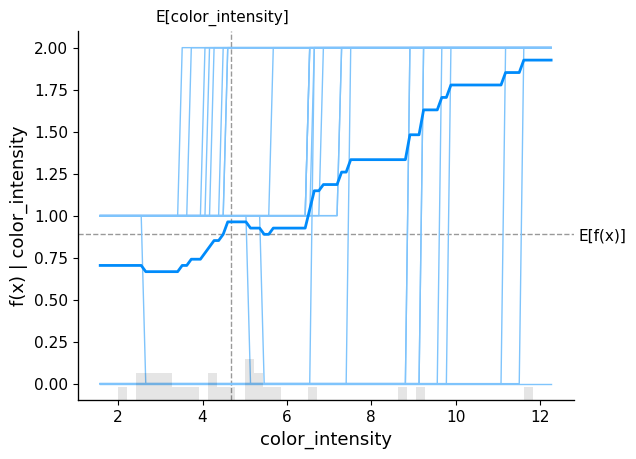

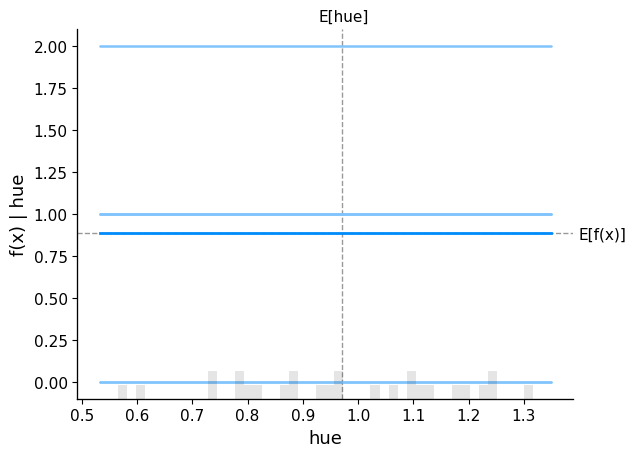

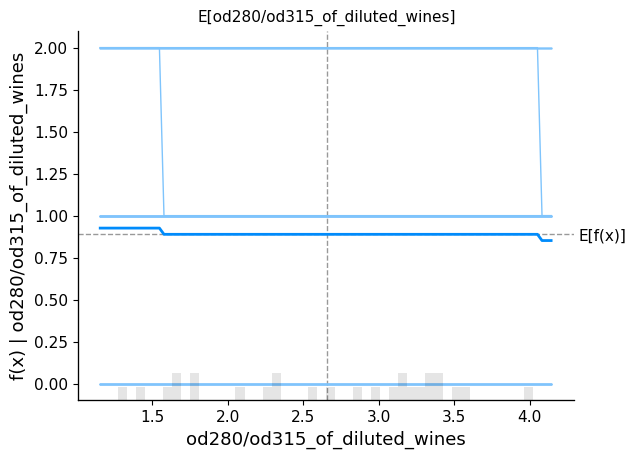

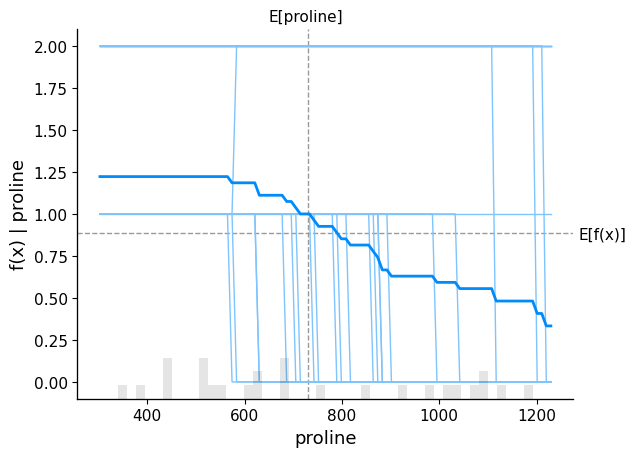

In [5]:
# Importation des bibliothèques
import shap
import sklearn
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialisation de SHAP
shap.initjs()

def print_wine_description(wine):
    for line in wine.DESCR.split("\n")[5:28]:
        print(line)

def load_and_preprocess_data():
    wine = load_wine()
    boston_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    boston_df["WineType"] = wine.target

    return wine, boston_df

def train_logistic_regression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)

    return log_reg, X_test, X_train, Y_train, Y_test

def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
    shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
    val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
    val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
    val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

    return val1, val2, val3, shap_vals

def generate_shap_bar_plots(log_reg_explainer, X_test, num_samples):
    for sample_idx in range(num_samples):
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[0], feature_names=wine.feature_names, max_display=len(wine.feature_names))
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[1], feature_names=wine.feature_names, max_display=len(wine.feature_names))
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[2], feature_names=wine.feature_names, max_display=len(wine.feature_names))

def generate_waterfall_plots(log_reg_explainer, X_test):
    shap_values = log_reg_explainer(X_test[:1])
    shap_values.feature_names = wine.feature_names

    shap.waterfall_plot(shap_values[0][:, 0], max_display=len(wine.feature_names))
    shap.waterfall_plot(shap_values[0][:, 1], max_display=len(wine.feature_names))
    shap.waterfall_plot(shap_values[0][:, 2], max_display=len(wine.feature_names))

def generate_decision_plot(log_reg_explainer, X_test):
    shap.multioutput_decision_plot(log_reg_explainer.expected_value.tolist(),
                                   log_reg_explainer.shap_values(X_test),
                                   row_index=0,
                                   feature_names=wine.feature_names,
                                   highlight=[1]
                                   )

def generate_dependence_plots(log_reg_explainer, X_test):
    for feature in wine.feature_names:
        for class_idx in range(3):
            shap.dependence_plot(feature, log_reg_explainer.shap_values(X_test)[class_idx],
                                 features=X_test,
                                 feature_names=wine.feature_names
                                 )

def generate_embedding_plots(log_reg_explainer, X_test):
    for feature in wine.feature_names:
        for class_idx in range(3):
            shap.embedding_plot(feature, log_reg_explainer.shap_values(X_test)[class_idx], feature_names=wine.feature_names)

def generate_force_plots(log_reg_explainer, X_test):
    for class_idx in range(3):
        shap.force_plot(log_reg_explainer.expected_value[class_idx],
                        log_reg_explainer.shap_values(X_test[0])[class_idx],
                        feature_names=wine.feature_names,
                        out_names="Wine Type")

def generate_summary_plot(log_reg_explainer, X_test):
    shap.summary_plot(log_reg_explainer.shap_values(X_test),
                      feature_names=wine.feature_names)

def generate_partial_dependence_plots(log_reg, X_test, wine):
    for feature in wine.feature_names:
        shap.partial_dependence_plot(feature,
                                     log_reg.predict,
                                     data=X_test,
                                     feature_names=wine.feature_names,
                                     model_expected_value=True,
                                     feature_expected_value=True,
                                     ice=True
                                     )

def main():
    warnings.filterwarnings("ignore")
    
    wine, boston_df = load_and_preprocess_data()

    X, Y = wine.data, wine.target
    print("Total Data Size : ", X.shape, Y.shape)

    log_reg, X_test, X_train, Y_train, Y_test = train_logistic_regression(X, Y)
    print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
    print("Train Accuracy : ", log_reg.score(X_train, Y_train))

    log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

    sample_idx = 0
    val1, val2, val3, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

    print("Expected/Base Values : ", log_reg_explainer.expected_value)
    print("Shap Values for Sample %d : " % sample_idx, shap_vals)
    print("Prediction From Model                            : ", \
          wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
    print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

    # Générer les graphiques
    generate_shap_bar_plots(log_reg_explainer, X_test, num_samples=1)
    generate_waterfall_plots(log_reg_explainer, X_test)
    generate_decision_plot(log_reg_explainer, X_test)
    generate_dependence_plots(log_reg_explainer, X_test)
    generate_embedding_plots(log_reg_explainer, X_test)
    generate_force_plots(log_reg_explainer, X_test)
    generate_summary_plot(log_reg_explainer, X_test)
    generate_partial_dependence_plots(log_reg, X_test, wine)

if __name__ == '__main__':
    main()


In [4]:
app_train = pd.read_csv('../data/application_train.csv')
app_test = pd.read_csv('../data/application_test.csv')

In [5]:
app_train.head(1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  

[1 rows x 122 columns]

In [6]:
app_test.head(1)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  

[1 rows x 121 columns]

In [7]:
# Importation des bibliothèques
import shap
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

def features_engineering(data_train, data_test):

    # Cette fonction regroupe toutes les opérations de features engineering
    # mises en place sur les sets train & test

    #############################################
    # LABEL ENCODING
    #############################################
    # Create a label encoder object
    le = LabelEncoder()
    le_count = 0

    # Iterate through the columns
    for col in data_train:
        if data_train[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(data_train[col].unique())) <= 2:
                # Train on the training data
                le.fit(data_train[col])
                # Transform both training and testing data
                data_train[col] = le.transform(data_train[col])
                data_test[col] = le.transform(data_test[col])
                
                # Keep track of how many columns were label encoded
                le_count += 1

    ############################################
    # ONE HOT ENCODING
    ############################################
    # one-hot encoding of categorical variables
    data_train = pd.get_dummies(data_train)
    data_test = pd.get_dummies(data_test)

    train_labels = data_train['TARGET']
    # Align the training and testing data, keep only columns present in both dataframes
    data_train, data_test = data_train.align(data_test, join = 'inner', axis = 1)
    # Add the target back in
    data_train['TARGET'] = train_labels

    ############################################
    # VALEURS ABERRANTES
    ############################################
    # Create an anomalous flag column
    data_train['DAYS_EMPLOYED_ANOM'] = data_train["DAYS_EMPLOYED"] == 365243
    # Replace the anomalous values with nan
    data_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
    data_test['DAYS_EMPLOYED_ANOM'] = data_test["DAYS_EMPLOYED"] == 365243
    # Replace the boolean column by numerics values 
    data_test["DAYS_EMPLOYED_ANOM"] = data_test["DAYS_EMPLOYED_ANOM"].astype("int")


    data_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

    # Traitement des valeurs négatives
    data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])

    ############################################
    # CREATION DE VARIABLES
    ############################################
    # CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
    # ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
    # CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
    # DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

    # Dans cet état d'esprit, nous pouvons créer quelques fonctionnalités qui tentent de capturer ce que nous pensons
    # peut être important pour savoir si un client fera défaut sur un prêt.
    # Ici, je vais utiliser cinq fonctionnalités inspirées de ce script d'Aguiar :

    # CREDIT_INCOME_PERCENT : le pourcentage du montant du crédit par rapport aux revenus d'un client
    # ANNUITY_INCOME_PERCENT : le pourcentage de la rente du prêt par rapport aux revenus d'un client
    # CREDIT_TERM : la durée du versement en mois (puisque la rente est le montant mensuel dû
    # DAYS_EMPLOYED_PERCENT : le pourcentage de jours employés par rapport à l'âge du client

    data_train_domain = data_train.copy()
    data_test_domain = data_test.copy()

    # data_train_domain['CREDIT_INCOME_PERCENT'] = data_train_domain['AMT_CREDIT'] / data_train_domain['AMT_INCOME_TOTAL']
    # data_train_domain['ANNUITY_INCOME_PERCENT'] = data_train_domain['AMT_ANNUITY'] / data_train_domain['AMT_INCOME_TOTAL']
    # data_train_domain['CREDIT_TERM'] = data_train_domain['AMT_ANNUITY'] / data_train_domain['AMT_CREDIT']
    # data_train_domain['DAYS_EMPLOYED_PERCENT'] = data_train_domain['DAYS_EMPLOYED'] / data_train_domain['DAYS_BIRTH']

    # data_test_domain['CREDIT_INCOME_PERCENT'] = data_test_domain['AMT_CREDIT'] / data_test_domain['AMT_INCOME_TOTAL']
    # data_test_domain['ANNUITY_INCOME_PERCENT'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_INCOME_TOTAL']
    # data_test_domain['CREDIT_TERM'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_CREDIT']
    # data_test_domain['DAYS_EMPLOYED_PERCENT'] = data_test_domain['DAYS_EMPLOYED'] / data_test_domain['DAYS_BIRTH']
    
    # Calcul de nouvelles caractéristiques basées sur les données du jeu d'entraînement

    # Pourcentage du crédit par rapport au revenu total
    data_train_domain['CREDIT_INCOME_PERCENT'] = data_train_domain['AMT_CREDIT'] / data_train_domain['AMT_INCOME_TOTAL']

    # Pourcentage de l'annuité (paiement mensuel du crédit) par rapport au revenu total
    data_train_domain['ANNUITY_INCOME_PERCENT'] = data_train_domain['AMT_ANNUITY'] / data_train_domain['AMT_INCOME_TOTAL']

    # Terme du crédit : rapport de l'annuité au montant du crédit
    data_train_domain['CREDIT_TERM'] = data_train_domain['AMT_ANNUITY'] / data_train_domain['AMT_CREDIT']

    # Pourcentage des jours d'emploi par rapport à l'âge en jours (une mesure de la stabilité financière)
    data_train_domain['DAYS_EMPLOYED_PERCENT'] = data_train_domain['DAYS_EMPLOYED'] / data_train_domain['DAYS_BIRTH']

    # Calcul de nouvelles caractéristiques basées sur les données du jeu de test

    # Pourcentage du crédit par rapport au revenu total
    data_test_domain['CREDIT_INCOME_PERCENT'] = data_test_domain['AMT_CREDIT'] / data_test_domain['AMT_INCOME_TOTAL']

    # Pourcentage de l'annuité par rapport au revenu total
    data_test_domain['ANNUITY_INCOME_PERCENT'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_INCOME_TOTAL']

    # Terme du crédit : rapport de l'annuité au montant du crédit
    data_test_domain['CREDIT_TERM'] = data_test_domain['AMT_ANNUITY'] / data_test_domain['AMT_CREDIT']

    # Pourcentage des jours d'emploi par rapport à l'âge en jours
    data_test_domain['DAYS_EMPLOYED_PERCENT'] = data_test_domain['DAYS_EMPLOYED'] / data_test_domain['DAYS_BIRTH']

    # Explication :
    # Ce code calcule plusieurs nouvelles caractéristiques (features) pour les jeux de données d'entraînement et de test.
    # Ces caractéristiques sont créées en effectuant des opérations mathématiques sur les colonnes existantes.
    # Elles peuvent être utiles pour mieux comprendre les relations entre les variables et améliorer la performance des modèles de machine learning.
    # Par exemple, le pourcentage du crédit par rapport au revenu total peut donner des informations sur la capacité de remboursement d'un emprunteur.
    # De même, le pourcentage de l'annuité par rapport au revenu total peut aider à évaluer si un client peut gérer le paiement mensuel d'un crédit.
    # Ces caractéristiques nouvellement créées sont souvent appelées "ingénierie des caractéristiques" et font partie du processus d'exploration de données.

    return data_train_domain, data_test_domain

# Charger vos DataFrames train et test
data_train = pd.read_csv('../data/application_train.csv')
data_test = pd.read_csv('../data/application_test.csv')
# # Appliquer les transformations sur les DataFrames train et test
# def apply_transformations(data):
#     data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
#     data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
#     data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
#     data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
#     return data

# data_train = apply_transformations(train)
# data_test = apply_transformations(test)

df_train, df_test = features_engineering(data_train, data_test)
    
#     # Séparer les données en caractéristiques (X) et variable cible (Y)
# X = train.drop(columns=['TARGET'])
# Y = train['TARGET']
# Séparer les données en caractéristiques (X ou train ) et variable cible (Y)
# train = df_train['TARGET']
# if "TARGET" in train:
train = df_train.drop(columns = ["TARGET"])
cible = df_train['TARGET']
print("Nombre de lignes dans train:", train.shape[0])
print("Nombre de lignes dans test:", cible.shape[0])
# print("Nombre de lignes dans Y:", Y.shape[0])

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (-1, 1))

# Réorganiser le tableau en 2D en utilisant reshape
# train = train.values.reshape(-1, 1)
# cible = cible.values.reshape(-1, 1)
# Fit on the training data
imputer.fit(train)
# imputer.fit(test)

# Transform both training and testing data
train = imputer.transform(train)
cible = imputer.transform(cible)

# Repeat with the scaler
scaler.fit(train)
# scaler.fit(test)
train = scaler.transform(train)
cible = scaler.transform(cible)
print("Nombre de lignes dans train:", train.shape[0])
print("Nombre de lignes dans test:", cible.shape[0])    
# Diviser les données d'entraînement en jeu d'entraînement et de test
X_train, X_val, Y_train, Y_val = train_test_split(train, cible, train_size=0.85, test_size=0.15, stratify=cible, random_state=123, shuffle=True)

# Entraîner votre modèle (par exemple, régression logistique)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Utiliser SHAP pour expliquer les prédictions
log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

sample_idx = 0
shap_vals = log_reg_explainer.shap_values(test.iloc[sample_idx])

# Continuer avec les étapes d'explication SHAP
# Par exemple, afficher les graphiques SHAP que vous souhaitez

# ...

# Assurez-vous d'adapter les noms des colonnes et les étapes d'explication SHAP
# à vos besoins spécifiques.


Nombre de lignes dans train: 307511
Nombre de lignes dans test: 307511


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Total Data Size :  (307511, 245) (307511,)
Test  Accuracy :  0.9192663732737876
Train Accuracy :  0.9192682031034799


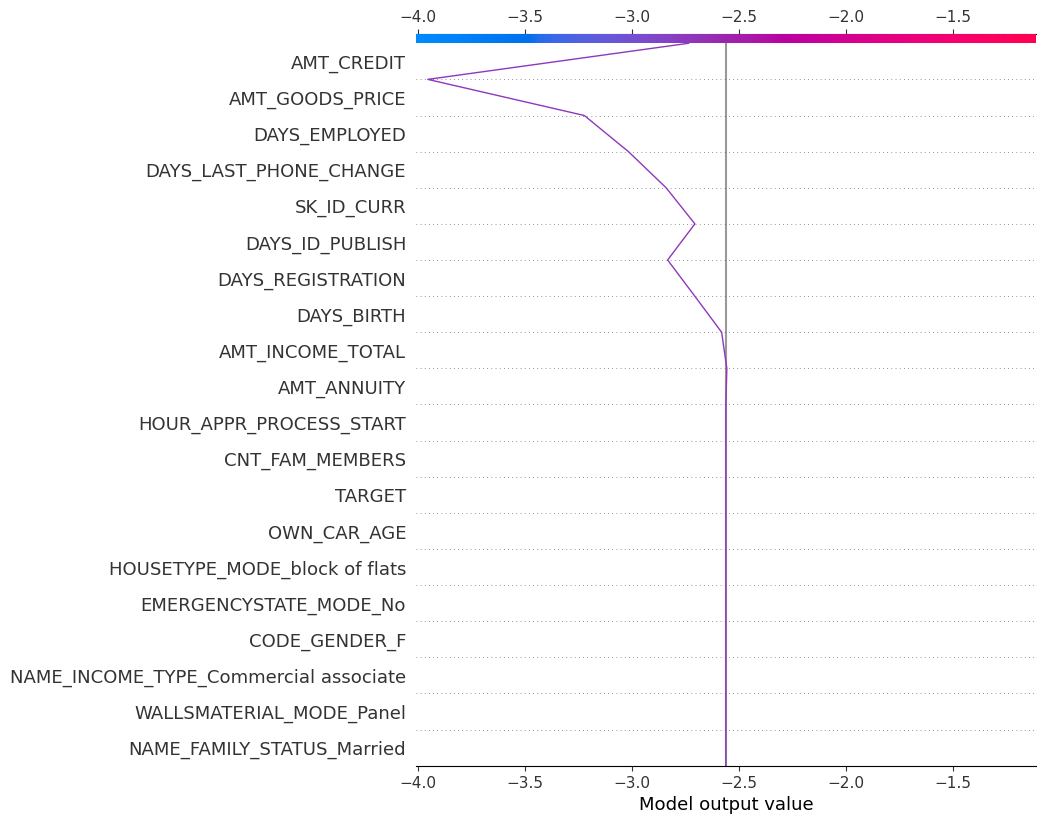

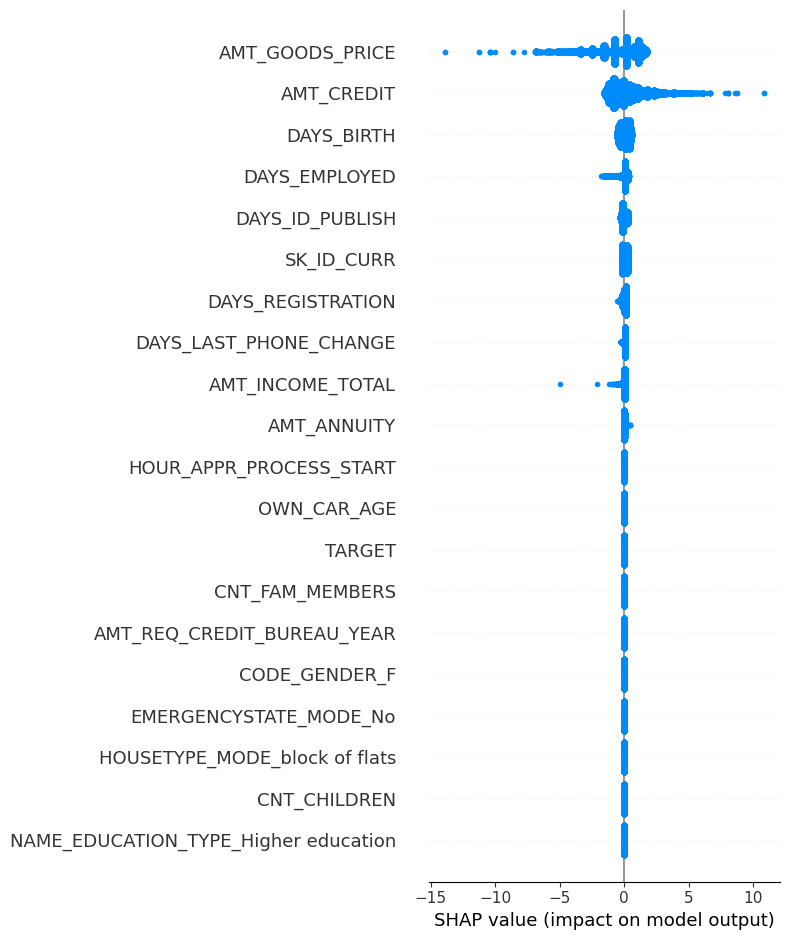

In [45]:
# Importation des bibliothèques
import shap
import sklearn
import pandas as pd
import numpy as np
import warnings
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialisation de SHAP
shap.initjs()


def load_and_preprocess_data():
    # Charger vos DataFrames train et test
    data_train = pd.read_csv('../data/application_train.csv')
    data_test = pd.read_csv('../data/application_test.csv')
    
    # Effectuer l'ingénierie des caractéristiques sur les DataFrames chargés
    df_train, df_test = features_engineering(data_train, data_test)
    
    return df_train, df_test
# def train_logistic_regression(X, Y):   


#     imputer = SimpleImputer(strategy='mean')  # Vous pouvez choisir une autre stratégie si nécessaire
#     Y = Y.values.reshape(-1, 1)
#     X = imputer.fit_transform(X)
#     Y = imputer.transform(Y)


#     X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

#     log_reg = LogisticRegression()
#     log_reg.fit(X_train, Y_train)

#     return log_reg, X_test, X_train, Y_train, Y_test
def train_logistic_regression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)
    
    imputer = SimpleImputer(strategy='mean')  # Vous pouvez choisir une autre stratégie si nécessaire
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)

    return log_reg, X_test, X_train, Y_train, Y_test

# def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
#     shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
#     val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
#     val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
#     val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

#     return val1, val2, val3, shap_vals
# def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
#     # Obtenir les valeurs SHAP pour l'échantillon
#     shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
    
#     # Les valeurs SHAP dépendent du nombre de classes dans votre modèle
#     # Vous devez accéder aux valeurs SHAP correctement en fonction du nombre de classes
#     if len(shap_vals) == 1:
#         val1 = log_reg_explainer.expected_value + shap_vals[0]
#     else:
#         val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
#         val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
#         val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()
    
#     return val1, val2, val3, shap_vals
def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
    shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])

    if isinstance(log_reg, LogisticRegression):
        val1 = log_reg_explainer.expected_value + shap_vals[0]
    else:
        # Gérer le cas où votre modèle a plus de classes (plus de valeurs SHAP)
        # Vous devrez ajuster cela en fonction de la structure de votre modèle
        val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()

    return val1, shap_vals

# def generate_shap_bar_plots(log_reg_explainer, X_test, num_samples):
# #     for sample_idx in range(num_samples):
#     shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[0], feature_names=df_train.columns, max_display=len(df_train.columns))
# #         shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[1], feature_names=df_train.columns, max_display=len(df_train.columns))
# #         shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[2], feature_names=df_train.columns, max_display=len(df_train.columns))

def generate_shap_bar_plots(log_reg_explainer, X_test, num_samples):
#     for sample_idx in range(num_samples):
#         print("feature_inds:", feature_inds)

    # Générer les valeurs SHAP pour un échantillon
    shap_values = log_reg_explainer.shap_values(X_test[num_samples])
    print("generate_shap_bar_plots shap_values:", shap_values)
    print("generate_shap_bar_plots shap_values[0] :", shap_values[0])    
    # Assurez-vous que feature_names correspond à vos données
    feature_names = df_train.columns  # Remplacez ceci par les noms de vos fonctionnalités

    # Générer le graphique SHAP pour l'échantillon actuel
    shap.bar_plot(shap_values[0], feature_names=feature_names)

def generate_summary_plot(log_reg_explainer, X_test):
    shap.summary_plot(log_reg_explainer.shap_values(X_test),
                      feature_names=df_train.columns)

#     # Convertissez le tableau numpy X_test en un DataFrame pandas avec les noms des colonnes
#     X_test_df = pd.DataFrame(X_test, columns=feature_names)

#     # Générez le résumé SHAP Plot
#     shap.summary_plot(log_reg_explainer.shap_values(X_test), feature_names=feature_names, plot_type='bar')
# def generate_waterfall_plots(log_reg_explainer, X_test):
#     shap_values = log_reg_explainer(X_test[:1])
# #     shap_values.feature_names = df_train.columns

#     shap.waterfall_plot(shap_values[0][:, 0], max_display=len(df_train.columns))
#     shap.waterfall_plot(shap_values[0][:, 1], max_display=len(df_train.columns))
#     shap.waterfall_plot(shap_values[0][:, 2], max_display=len(df_train.columns))
  # Cette fonction génère des graphiques de cascade SHAP pour chaque caractéristique d'un modèle

def generate_waterfall_plots(log_reg_explainer, X_test):
    # Calcul des valeurs SHAP pour le premier échantillon dans X_test
    shap_values = log_reg_explainer(X_test[:1])
    
    # Boucle à travers chaque caractéristique pour créer un graphique de cascade
    for feature_index in range(X_test.shape[1]):
        # Génère un graphique de cascade pour la caractéristique actuelle
        shap.waterfall_plot(shap_values[0][:, feature_index], max_display=len(df_train.columns), feature_names=df_train.columns)

# Explication de l'utilité de ce code :
# Les graphiques de cascade SHAP (SHAP waterfall plots) sont utilisés pour comprendre comment chaque caractéristique
# contribue à la prédiction d'un modèle. Ces graphiques montrent comment la valeur SHAP totale pour chaque échantillon
# est distribuée entre les différentes caractéristiques. Chaque étape dans le graphique de cascade représente
# la contribution d'une caractéristique spécifique à la différence entre la valeur SHAP totale et la valeur de base.
# En bouclant à travers chaque caractéristique de X_test, ce code génère un graphique de cascade pour chaque caractéristique,
# permettant ainsi d'analyser comment chaque caractéristique influence la prédiction du modèle.

# Remarque : Assurez-vous d'avoir correctement défini la variable 'df_train' contenant les noms de vos caractéristiques
# avant d'exécuter ce code, car elle est utilisée pour afficher les noms des caractéristiques dans les graphiques.
# def generate_decision_plot(log_reg_explainer, X_test):
#     shap.multioutput_decision_plot(log_reg_explainer.expected_value.tolist(),
#                                    log_reg_explainer.shap_values(X_test),
#                                    row_index=0,
#                                    feature_names=df_train.columns,
#                                    highlight=[1]
#                                    )
def generate_decision_plot(log_reg_explainer, X_test, row_index=0, highlight=None):
    expected_value = [log_reg_explainer.expected_value.tolist()]  # Convertit la valeur attendue en liste
    shap_values = [log_reg_explainer.shap_values(X_test)]  # Convertit les valeurs SHAP en liste
    feature_names = df_train.columns.tolist()  # Convertit les noms de colonnes en liste

    shap.multioutput_decision_plot(expected_value, shap_values, row_index=row_index, feature_names=feature_names, highlight=highlight)

def main():
    warnings.filterwarnings("ignore")
    
    df_train, df_test = load_and_preprocess_data()
    df_train.head(1)
#     X, Y = df_train, df_train.target
    X = df_train
    Y = df_train['TARGET']
    print("Total Data Size : ", X.shape, Y.shape)

    log_reg, X_test, X_train, Y_train, Y_test = train_logistic_regression(X, Y)
    print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
    print("Train Accuracy : ", log_reg.score(X_train, Y_train))
# 
# Dans votre fonction main, utilisez la fonction correcte
# log_reg, X_test, X_train, Y_train, Y_test = train_logistic_regression(X, Y)
# log_reg_explainer = shap.LinearExplainer(log_reg, X_train)
# sample_idx = 0
# val1, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

# 
    log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

    sample_idx = 0
#     val1, val2, val3, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)
    val1, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

#     print("Expected/Base Values : ", log_reg_explainer.expected_value)
#     print("Shap Values for Sample %d : " % sample_idx, shap_vals)
#     print("Prediction From Model                            : ", \
#           wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
#     print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

#     # Générer les graphiques
#     generate_shap_summary_plot(log_reg_explainer, X_test, num_samples=1)
#     generate_shap_bar_plots(log_reg_explainer, X_test, num_samples=1)
#     generate_waterfall_plots(log_reg_explainer, X_test)
    generate_decision_plot(log_reg_explainer, X_test)
#     generate_dependence_plots(log_reg_explainer, X_test)
#     generate_embedding_plots(log_reg_explainer, X_test)
#     generate_force_plots(log_reg_explainer, X_test)
    generate_summary_plot(log_reg_explainer, X_test)
#     generate_partial_dependence_plots(log_reg, X_test, wine)

if __name__ == '__main__':
    main()


In [49]:
df_train.head(1)

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   

   REGION_POPULATION_RELATIVE  ...  WALLSMATERIAL_MODE_Stone, brick  \
0                    0.018801  ...                                1   

   WALLSMATERIAL_MODE_Wooden  EMERGENCYSTATE_MODE_No  EMERGENCYSTATE_MODE_Yes  \
0                          0                       1                        0   

   TARGET  DAYS_EMPLOYED_ANOM  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  \
0       1               False               2.007889                0.121978   

   CREDIT_TERM  DAYS_EMPLOYED_PERCENT  
0     0.060749              -0.067329  

[1 rows x 245 columns]